### For the homeworks we are going to use the "[Online News Popularity Data Set](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity#)"

The dataset can be used both for regression and classification tasks.

#### Source:

Kelwin Fernandes INESC TEC, Porto, Portugal/Universidade do Porto, Portugal.
Pedro Vinagre ALGORITMI Research Centre, Universidade do Minho, Portugal
Paulo Cortez ALGORITMI Research Centre, Universidade do Minho, Portugal
Pedro Sernadela Universidade de Aveiro

#### Data Set Information:

* The articles were published by Mashable (www.mashable.com) and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. The original content be publicly accessed and retrieved using the provided urls.
* Acquisition date: January 8, 2015
* The estimated relative performance values were estimated by the authors using a Random Forest classifier and a rolling windows as assessment method. See their article for more details on how the relative performance values were set.

Attribute Information:

Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)

Attribute Information:
0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares (target)


The first two columns (url and time_delta) are non-predictive and should be ignored

The last column **shares** contains the value to predict.

### Regression
In the case of regression we want to predict the value of the share column.

### Classification
In the case of classification we want to predict one of two classes:

* *low* -- shares < 1,400
* *high* -- shares >= 1,400

### Metrics

#### Regression
To evaluate how good we are doing on the **regression** task we will use the Root Mean Squared Error (RMSE). RMSE is given by

$$
\sqrt{\frac{1}{n}\sum\limits_{i=1}^{n}{\Big(d_i -f_i\Big)^2}}
$$


where:

* $n$ is the number of test samples
* $d_i$ is the ground truth value of the i-th sample
* $f_i$ is the predicted value of the i-th sample


#### Classification
To evaluate how good we are doing on the **classification** task we will use the accuracy metrics. Accuracy is given by

$$
\frac{TP+TN}{TP+TN+FP+FN}
$$

where:

* TP is the number of *correctly* classified positive samples
* TN is the number of *correctly* classified negative samples
* FP is the number of *incorrectly* classified positive samples
* FN is the number of *incorrectly* classified negative samples

In [40]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip

--2023-05-31 07:45:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7476401 (7.1M) [application/x-httpd-php]
Saving to: ‘OnlineNewsPopularity.zip.1’

OnlineNewsPopularit 100%[===================>]   7.13M  28.8MB/s    in 0.2s    

2023-05-31 07:45:33 (28.8 MB/s) - ‘OnlineNewsPopularity.zip.1’ saved [7476401/7476401]



In [41]:
!unzip OnlineNewsPopularity.zip

Archive:  OnlineNewsPopularity.zip
replace OnlineNewsPopularity/OnlineNewsPopularity.names? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [42]:
import pandas as pd

Format properly the names of the columns and remove the first two columns

In [43]:
df = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
df = df.rename(columns=lambda x: x.strip())
df = df.iloc[: , 2:]

In [44]:
df.dtypes

n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg                       float64
kw_max_avg      

### Let's plot some of the columns

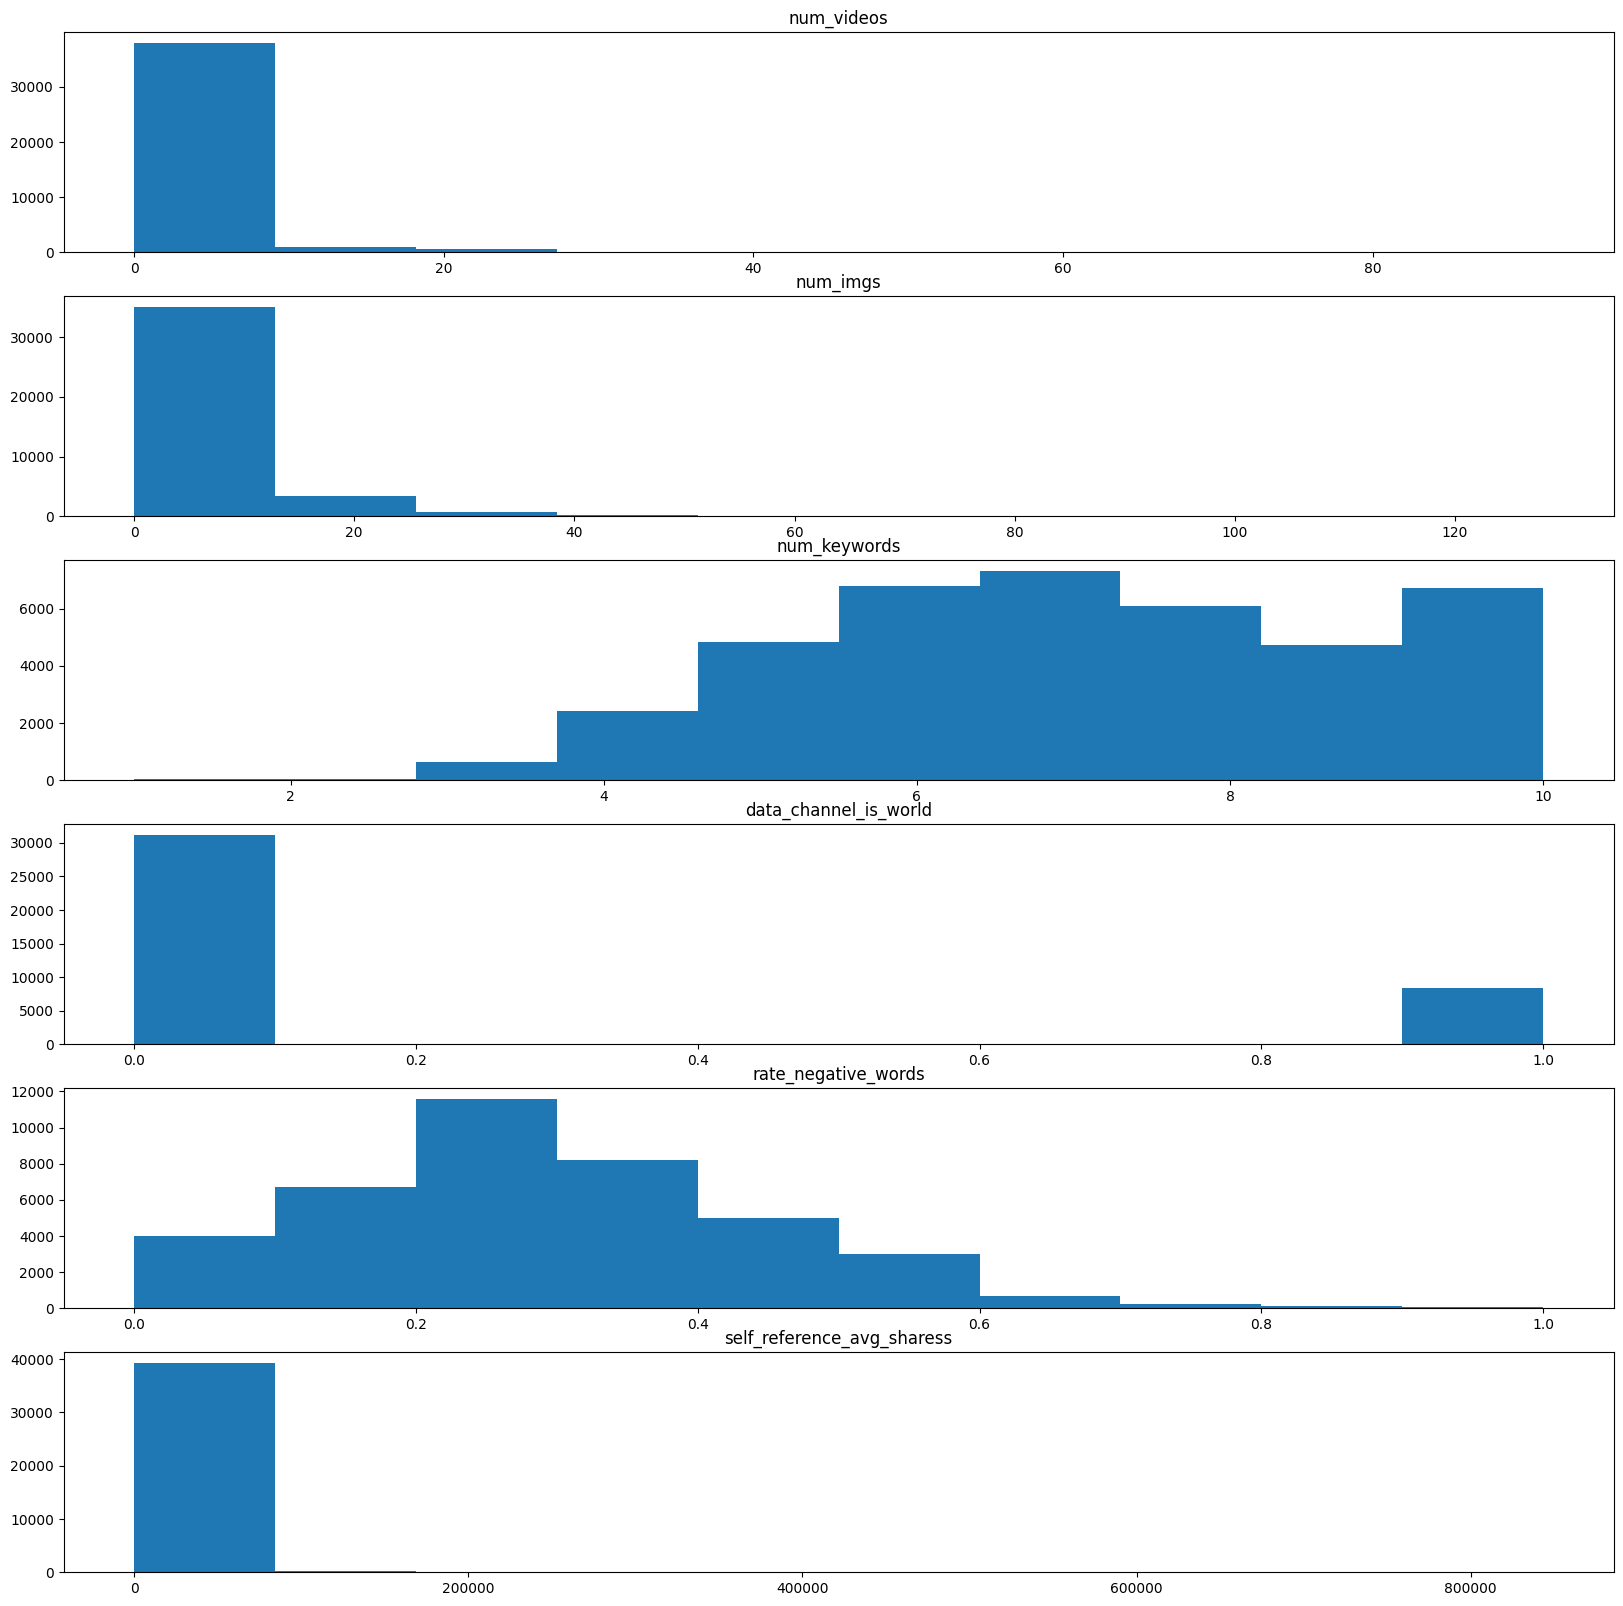

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = [
    'num_videos',
    'num_imgs',
    'num_keywords',
    'data_channel_is_world',
    'rate_negative_words',
    'self_reference_avg_sharess',
]

fig, ax = plt.subplots(len(columns_to_plot), 1, figsize=(20, 20))

for i, column in enumerate(columns_to_plot, 0):
  ax[i].hist(df[column])
  ax[i].title.set_text(column)

plt.show()

# Classificazione con albero di decisione

Tutte le librerie importante per l'implementazione del decision tree

In [46]:
import statistics 
import numpy as np
import math

### Funzioni che modificano il dataset 


* **add_Levelcol(nuovo)** Prende in input un dataframe e aggiunge a questo la colonna delle ground truth discretizzate, secondo il criterio : shares > 1400 -> 1, altrimenti -> 0
* **discretizza(dati)** Prende in input un dataframe e lo discretizza


In [47]:
#funzione per aggiungere nuova colonna
def add_Levelcol(nuovo):
  arr = []                 
  num_rows = nuovo.shape[0]
  i = 0
  while(i < num_rows):
    val = nuovo['shares'][i]
    if(val >= 1400):
      arr.append(1)
    else:
      arr.append(0)
    i = i + 1

  new_col = pd.Series(arr)  #creazione nuova col
  nuovo['Level'] = new_col    #aggiungiamo la nuova colonna al dataframe new
  return nuovo

def discretizza(dati):
  col_discr = list(dati.columns.values)
  for column in enumerate(col_discr, 0):
   if(column[1] != "shares" and column[1] != "url"):
      med = dati[column[1]].median()
      dati[column[1]] = np.digitize(dati[column[1]], bins = [med])
  return dati

### Metrica e funzioni usate per lo splitting


Implementazione della metrica usata nei problemi di classificazione. <br>
La funzione ACCURACY calcola l'accuratezza delle previsioni confrontando una colonna di valori di ground truth con una colonna di valori di previsione. Per ogni coppia di valori uguali, viene incrementato un contatore tp_tn. Alla fine, l'accuratezza viene calcolata dividendo tp_tn per la lunghezza della colonna di ground truth e moltiplicando per 100 per ottenere una percentuale.

In [48]:
def ACCURACY(colonna_ground, colonna_prev):   #ACCURACY prende in input colonna delle previsioni e della ground truth, colonna_ground = y_test | colonna_prev y_prev
  i = 0
  tp_tn = 0
  arr = np.array(colonna_ground.values)
  arr2 = np.array(colonna_prev.values)
  while(i < len(arr2)):                     
    if( arr[i] == arr2[i] ):               
      tp_tn = tp_tn + 1
    i = i + 1
  ac = tp_tn/len(arr)*100
  return ac


Le funzioni sotto riportate sono utilizzate nel processo di selezionare l'attributo ottimale per lo split in ogni nodo. L'attributo scelto sarà quello con il gain massimo, il che aiuta a creare partizioni per la classificazione.
Le funzioni principali sono:

* **entropia**(input): Calcola l'entropia di una colonna di dati utilizzando la formula dell'entropia di Shannon

* **reminder**(data, split_name, target_name): Calcola il remainder per uno split specifico. Divide il set di dati in base ai valori distinti di uno specifico attributo e calcola il remainder sommando le entropie delle due partizioni risultanti.

* **gain**(data, split_name, target_name): Calcola il guadagno per uno split specifico. 

* **max_gain**(dataframe, attributi_rimasti): Trova l'attributo con il massimo guadagno. Itera attraverso gli attributi rimasti e calcola il guadagno per ciascuno. Restituisce l'attributo con il guadagno massimo.



In [49]:
def entropia(input):  #in input colonna, es  y_test o y_train oppure sulle y dei subset

  a = np.array(input.values)      #mi sposto valori della colonna in array                 
  count_occ = np.count_nonzero(a == 1)     #conto le occorrenze di valore 1
  if(len(a) != 0):                                                 
    p = count_occ/len(a)  
    if(p == 1.0):
      return 0 #perche q = 0
    else:
      q = 1 - p
      return  - (p*math.log(p,2)) - (q * math.log(q,2))

  else: #caso in cui sottopartizione che ti arriva non contine nulla ma sta tutto in altra partizione
    p = 0
    q = 1
    return 0  #perchè - (p*math.log(p,2)) = 0 e essendo q = 1 logaritmo in base 2 di 1 è 0

#######################################################################################################################################################################################################################
  
def reminder(data, split_name, target_name):
  
  values = [1,0] #avendo discretizzato il dataset sicuro i valori delle feature che i vari samples possono assumere sono o 0 o 1

  #Creazione di due partizioni del set in base ai valori distinti che hanno, avendo discretizzato saranno due  
  first_split = data[data[split_name] == values[0]]
  second_split = data[data[split_name] == values[1]] 

  remainder = 0
  num_elem = data.shape[0]
  #calcolo del remainder
  card_part_first = first_split.shape[0] #cardinalità di elementi nella partizione
  prob = ( card_part_first/ num_elem ) 
  remainder = (prob * entropia(first_split[target_name])) #entropia su first split

  card_part_second = second_split.shape[0]
  prob = (card_part_second / num_elem ) 
  remainder = remainder + (prob *  entropia(second_split[target_name]) )  #entropia su second split 

  return remainder

#######################################################################################################################################################################################################################

# 1° riferimento a df  2° param è NOME attr su cui vuoi splittare 3° NOME colonna target
def gain(data, split_name, target_name):
  return entropia(data[target_name]) - reminder(data, split_name, target_name)

#######################################################################################################################################################################################################################

def max_gain(dataframe, attributi_rimasti):
  y = 'Level'  #nome della colonna che contiene ground truth
  max_attr= "" #è feature quello che toglierai da array attributi rimasti poichè sarà la feature con maggiore GAIN
  max_gain_val = - float("inf") 
  for attr in attributi_rimasti:
    if(gain(dataframe,attr,y) > max_gain_val):
      max_attr = attr
      max_gain_val = gain(dataframe,attr,y)

  return max_attr 


### Funzioni utili alla realizzazione dell'albero di decisione e alla successiva predizione delle ground truth 

* **obtain_attr**(): Legge il file CSV del dataset e restituisce due liste. La prima lista contiene solo gli  attributi predittivi del dataset su cui si farà lo splitting, mentre la seconda lista contiene tutte le colonne del dataset.

* **val_clas**(Y): Funzione usata quando si arriva a una foglia, questa restituisce il valore più comune nella lista dei sample

* **split**(dataset, feature_index, val): Effettua la divisione del dataset in base al valore dei sample rispetto a una data feature. Restituisce due sottoinsiemi del dataset: uno con valori corrispondenti al valore specificato dell'attributo e l'altro con valori diversi.

* **trova_indice**(valore, array): Trova l'indice nella lista di attributi della feature su cui si è appena fatto lo split del dataset

* **print_tree**(node, prefix="", is_last=True): Stampa l'albero di decisione in una rappresentazione grafica utilizzando simboli speciali. La funzione è ricorsiva e stampa in modo ordinato tutti i nodi dell'albero.

* **make_prediction**(x, nodo): Effettua una previsione sulla ground truth di un dataset x utilizzando l'albero di decisione che si è allenato in precedenza. La funzione si muove attraverso l'albero in base ai valori degli attributi fino a raggiungere un nodo foglia che contiene la classificazione.

* **predict**(X, tree): Effettua previsioni delle Y chiamando la funzione make_prediction(x,nodo). Restituisce una lista di previsioni corrispondenti ai dati di X.

In [50]:
def obtain_attr(): #funz per ottenere gli attributi PREDITTIVI
  f = open('OnlineNewsPopularity/OnlineNewsPopularity.csv', "r")
  row = f.readlines()
  first_row = row.pop(0).split(',')
  f.close()

  lista_attr = [] #continee solo attributi predittivi
  lista_colonne = [] #contiene tutte le colonne
  for i in first_row:
    if(i != 'url' and i != ' timedelta' and i != ' shares\n' and i != 'Level'):   
      i = i.strip()
      lista_attr.append(i)
    i = i.strip()
    lista_colonne.append(i)
  return lista_attr, lista_colonne

#######################################################################################################################################################################################################################

def val_clas(Y):
    Y = list(Y)
    return max(Y, key=Y.count)

#######################################################################################################################################################################################################################

def split(dataset, feature_index, val):
  dataset_left = np.array([i for i in dataset if i[feature_index] == val]) #vai a sinistra se = 0
  dataset_right = np.array([j for j in dataset if j[feature_index] != val])
  return dataset_left, dataset_right

#######################################################################################################################################################################################################################

def trova_indice(valore, array):
    try:
        indice = array.index(valore)
        return indice
    except ValueError:
        print("\nValore non trovato nell'array")

#######################################################################################################################################################################################################################


def print_tree(node, prefix="", is_last=True):
    """
    Stampa l'albero con simboli grafici.
    """
     # Simboli grafici per rappresentare l'albero
    stem = "├── "
    last = "└── "
    indent = "    "

    # Stampa il valore del nodo corrente
    if node.rank is not None:
        print(prefix + (last if is_last else stem) + str(node.rank))
    if node.sx is not None or node.dx is not None: 
        print(prefix + (last if is_last else stem) + "feature: " + str(node.attr)) 

    # Calcola i prefissi per i nodi figli
    child_prefix = prefix + (indent if is_last else "│   ")

    # Stampa i nodi figli ricorsivamente
    if node.sx is not None:
        print_tree(node.sx, child_prefix, is_last=(node.dx is None))
    if node.dx is not None:
        print_tree(node.dx, child_prefix, is_last=True)
        
#######################################################################################################################################################################################################################

def make_prediction(x, nodo):
  if(nodo.rank != None):
    return nodo.rank
  else:                                                   #se non ha classificazione vuol dire che è un nodo centrale
    feature_val = x[nodo.attr_index]
    if feature_val == 0:
      return make_prediction(x, nodo.sx)
    else:
       return make_prediction(x, nodo.dx)
  

def predict(X,tree):
  pred = [make_prediction(x,tree.root) for x in X.values] #prende riga per riga
  return pred

#######################################################################################################################################################################################################################

def grow_tree(dataframe, attributi_rimasti, parent_examples,max_depth, intero_dataframe, lista_colonne):#max depth è un valore che da x scalo ogni volta 
  
  y_par = parent_examples[:,-1]   
  s = np.shape(dataframe)
  if(s == (0,0) or s == (0,)):   
    a = val_clas(y_par)             #se non ci stanno piu sample fai la maggioranza(parent_examples) -> return nodo foglia contenente la classificazione     
    return Nodo( rank = a ) 

  Y = dataframe[:,-1]

  if (max_depth == 1):              #sei arrivato a altezza massima            
    a = val_clas(Y)
    return Nodo( rank = a )                     

  a = np.unique(Y)
  if( len(a) == 1):                             #valori_unici = Y.nunique() restituisce numero di valori unici quindi se questo è uguale a 1 vuol dire che sono tutti uguali
    a = val_clas(Y)
    return Nodo( rank = a )                     #la classificazione è uguale per tutti quindi me la trovo con maggioranza
 
  if not attributi_rimasti:                     #check che attributi_rimasti non sia vuoto() -> in caso guardi la maggioranza(sample), return nodo foglia contenente la classificazione    
    a = val_clas(Y)
    return Nodo( rank = a ) 
                     
  attr_max =  max_gain(intero_dataframe,attributi_rimasti)     #restituisce attributo su cui fare lo split, ho aggiunto ai parametri di grow_tree intero_dataframe perchè serviva sia per questa funzione sia per classe nodo    
  attributi_rimasti.remove(attr_max)                           #attr max andrà rimosso da lista di attributi 
  attr_ind = trova_indice(attr_max,lista_colonne)
  dataframe_left, dataframe_right = split(dataframe, attr_ind , 0)
  sotto_albero_SX = grow_tree( dataframe_left,  attributi_rimasti, dataframe, max_depth - 1, intero_dataframe, lista_colonne ) #che ritona albero
  sotto_albero_DX = grow_tree( dataframe_right, attributi_rimasti, dataframe, max_depth - 1, intero_dataframe, lista_colonne ) #che ritona albero

  return Nodo(dataframe ,sx = sotto_albero_SX, dx =  sotto_albero_DX, attr = attr_max, attr_index = attr_ind ) #metto attr perchè non è nodo foglia
 

## Classe Nodo e DecisionTreeClassifier

La classe **Nodo** rappresenta un nodo dell'albero decisionale. Ha diversi attributi per memorizzare le informazioni relative al nodo, inclusi i dati del dataframe associato al nodo, i campioni di addestramento, la classificazione del nodo (solo per i nodi foglia), i riferimenti ai nodi figli (sinistro e destro), l'attributo utilizzato per lo split e l'indice dell'attributo nell'elenco degli attributi.

La classe **DecisionTreeClassifier** rappresenta il classificatore dell'albero decisionale. Ha un attributo root che punta alla radice dell'albero.


In [51]:
class Nodo():
  def __init__(self, df = None, samples = None, rank = None,sx = None ,dx = None, attr = None, attr_index = None): #funz che chiami quando crei nodo, gli passi val se non gli passi allora ci sono valori di default
    
    #info per nodi centrali
    self.dataframe = df
    self.sx = sx
    self.dx = dx
    self.attr = attr    #per i nodi non foglia salvo la feature su cui splittano
    self.attr_index = attr_index
   
    #info solo per i nodi foglia
    self.rank = rank


class DecisionTreeClassifier():
  def __init__(self, df=None, samples=None, rank=None, sx=None, dx=None, attr=None, attr_index=None): 
    self.root = Nodo(df, samples, rank, sx, dx, attr, attr_index)


## Avvio programma

Implementazione tramite sklearn

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = discretizza(dati)
dati = add_Levelcol(dati) 
dati = dati.iloc[:,2:]

#80% train && val , 20% test
x_train_val, x_test, y_train_val, y_test = train_test_split(dati.iloc[:, :58], dati.iloc[:, -1], test_size=0.2, random_state=25)

# Create the decision tree classifier
clf = DecisionTreeClassifier(max_depth=6)

# Train the classifier on the training data
clf.fit(x_train_val, y_train_val)

# Make predictions on the test data
y_pred = clf.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.619119687224114



Il codice sottostante carica il dataframe lo processa, divide i samples in insiemi di addestramento, validazione e test. Successivamente esegue la model selection per determinare l'altezza migliore per l'albero decisionale e addestra l'albero finale utilizzando l'insieme di addestramento e di validazione. Infine, valuta l'accuratezza dell'albero decisionale sull'insieme di test e stampa l'accuratezza finale.

In [52]:
from sklearn.model_selection import train_test_split

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = discretizza(dati)
dati = add_Levelcol(dati) 

#80% train && val , 20% test
x_train_val, x_test, y_train_val, y_test = train_test_split(dati.iloc[:, :60], dati.iloc[:, -1], test_size=0.2, random_state=25)

#70% train , 30% val
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size=0.25, random_state=25)

dataframe_intero_model_selection = dati.copy().loc[x_train.index]
dataframe_intero_model_selection = dataframe_intero_model_selection.drop("shares", axis=1)

dataframe_intero_train_finale = dati.copy().loc[x_train_val.index]
dataframe_intero_train_finale = dataframe_intero_train_finale.drop("shares", axis=1)

y_train = y_train.values.reshape(-1,1)

dataset_per_validation = np.concatenate((x_train, y_train), axis=1)
lista_attr, lista_colonne = obtain_attr()

max_accuracy = 0
altezza_best_accuracy = 0 

accuracy_for_plot = []

#Model Selection cambiando l'iperparametro dell'altezza dell 'albero decisionale
print("---------------- MODEL SELECTION ----------------\n")
prof_val = [3,6,9,12,15] #valori dell'altezza massima albero 
for i in prof_val:
  y_predict = []
  lista_attr, lista_colonne = obtain_attr()
  
  alb = DecisionTreeClassifier(df = dataset_per_validation )
  alb.root = grow_tree(dataset_per_validation, lista_attr, dataset_per_validation, i ,dataframe_intero_model_selection, lista_colonne)  #prende due volte il dataser per intero perche il primo lo modifichi durante l'esecuzione del alg e altro no
  y_predict = pd.Series( predict(x_val, alb) )
  
  a = ACCURACY(y_val,y_predict)
  print("altezza albero massima",i,", accuracy pari a:",ACCURACY(y_val,y_predict) ,"\n")
  accuracy_for_plot.append(a)
  if a > max_accuracy:
    max_accuracy = a
    altezza_best_accuracy = i

print("---------------- Fine Model Selection: altezza migliore è ", altezza_best_accuracy," ----------------\n")

albero_finale = DecisionTreeClassifier()
y_train_val = y_train_val.values.reshape(-1,1)
dataset_finale = np.concatenate((x_train_val, y_train_val), axis=1) # allenamento sull'unione di val e train
lista_attr, lista_colonne = obtain_attr() 

max_depth = altezza_best_accuracy #ottenuta attraverso la model selection fatta su validation test
albero_finale.root = grow_tree(dataset_finale, lista_attr, dataset_finale, max_depth ,dataframe_intero_train_finale, lista_colonne) 
print("Test con altezza:",altezza_best_accuracy,"\n")

print_tree(albero_finale.root)
y_predict_finale = []
y_predict_finale = pd.Series( predict(x_test, albero_finale) )

print("\naccuracy finale dell'albero decisionale è: ",ACCURACY(y_test,y_predict_finale))




---------------- MODEL SELECTION ----------------

altezza albero massima 3 , accuracy pari a: 59.93189557321226 

altezza albero massima 6 , accuracy pari a: 59.982343296758735 

altezza albero massima 9 , accuracy pari a: 59.805776264346065 

altezza albero massima 12 , accuracy pari a: 59.969731365872114 

altezza albero massima 15 , accuracy pari a: 59.91928364232564 

---------------- Fine Model Selection: altezza migliore è  6  ----------------

Test con altezza: 6 

└── feature: kw_avg_avg
    ├── feature: self_reference_avg_sharess
    │   ├── feature: self_reference_min_shares
    │   │   ├── feature: kw_max_avg
    │   │   │   ├── feature: self_reference_max_shares
    │   │   │   │   ├── 0
    │   │   │   │   └── 0
    │   │   │   └── feature: LDA_02
    │   │   │       ├── 0
    │   │   │       └── 0
    │   │   └── feature: global_subjectivity
    │   │       ├── feature: global_sentiment_polarity
    │   │       │   ├── 0
    │   │       │   └── 0
    │   │       └── feat

Grafico che mostra come varia il valore della metrica accuracy al variare dell'iperparametro altezza massima dell'albero, possiamo noat

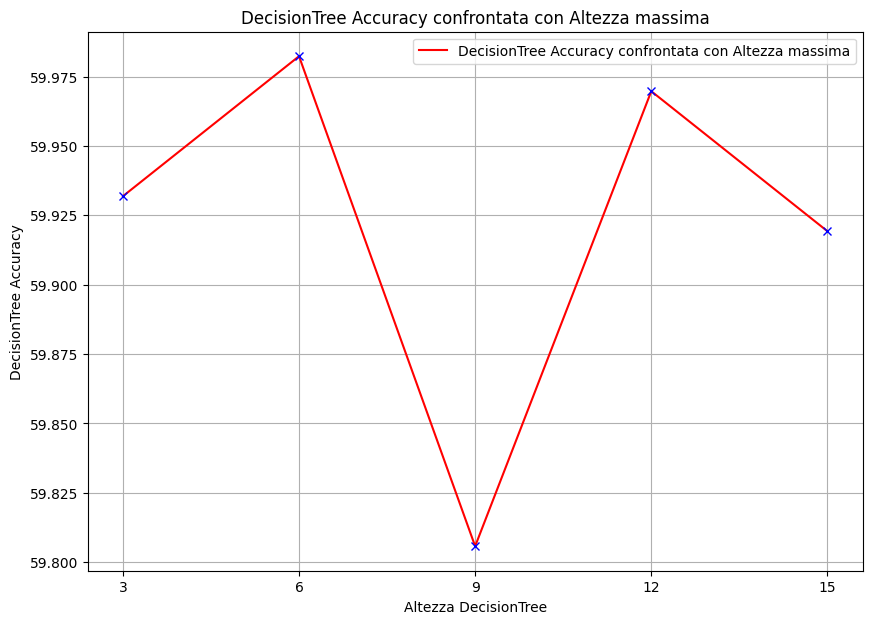

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(prof_val, accuracy_for_plot, 'r-', label='DecisionTree Accuracy confrontata con Altezza massima')
plt.plot(prof_val, accuracy_for_plot, 'bx')
plt.xlabel('Altezza DecisionTree')
plt.ylabel('DecisionTree Accuracy')
plt.legend()
plt.grid()
plt.title('DecisionTree Accuracy confrontata con Altezza massima')

plt.xticks(range(min(prof_val), max(prof_val)+1, 3))#ascisse ogni 3

plt.show()


La **matrice di confusione** fornisce una panoramica delle predizioni effettuate dal modello. Le righe rappresentano la ground truth (che indica sostanzialmente la vera classificazione di un sample), mentre le colonne rappresentano le predizioni del modello. Dai risultati, possiamo dedurre quanto segue:

* Per la classe 0, sono stati classificati correttamente 1832 casi (veri negativi), ma sono stati erroneamente classificati come classe 1 1942 casi (falsi positivi).
* Per la classe 1, sono stati classificati correttamente 2964 casi (veri positivi), ma sono stati erroneamente classificati come classe 0 1191 casi (falsi negativi).

La precisione rappresenta la percentuale di istanze correttamente classificate come una determinata classe rispetto a tutte le istanze classificate come tale classe, la **recall** invece va a identificare con quale sensibilità identifico i valori positivi. Si calcola come il numero totali
di predizioni positive effettuate vere, sul numero totale di predizioni positive effettuate, le quali comprendono
sia le predizioni positive vere, sia le predizione positive classificate in modo sbagliato, ovvero i falsi negativi 

Per la classe 0, l'albero di decisione ha ottenuto una precisione del 61% e una recall del 49%. Ciò indica che il modello ha classificato correttamente il 61% dei casi etichettati come classe 0, ma ha perso il 51% dei casi reali di classe 0.

Per la classe 1, l'albero di decisione ha ottenuto una precisione del 60% e un recall del 71%. Ciò indica che il modello ha classificato correttamente il 60% dei casi etichettati come classe 1, ma ha perso il 29% dei casi reali di classe 1.

L'accuratezza complessiva del modello è del 60%, che rappresenta la percentuale di predizioni corrette sul totale delle istanze.


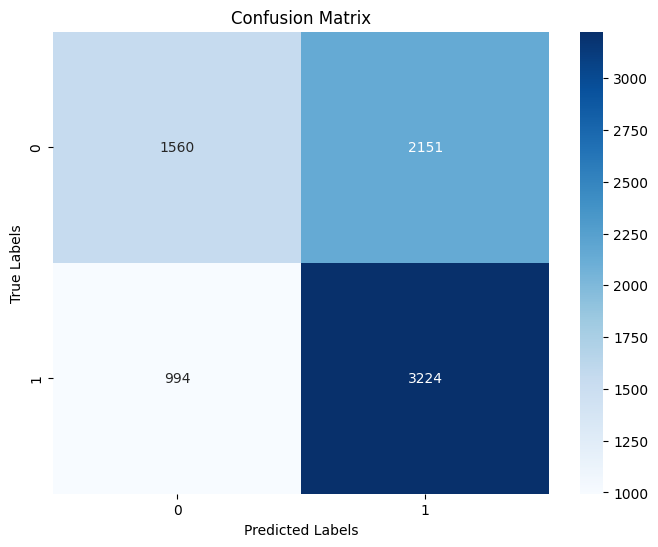

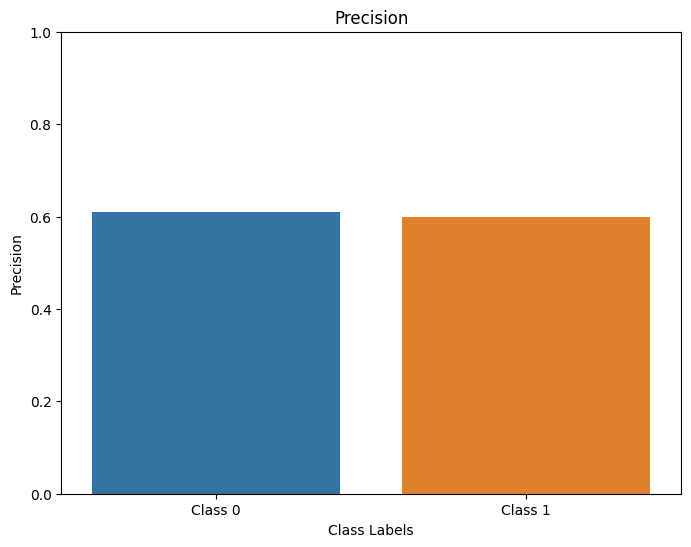

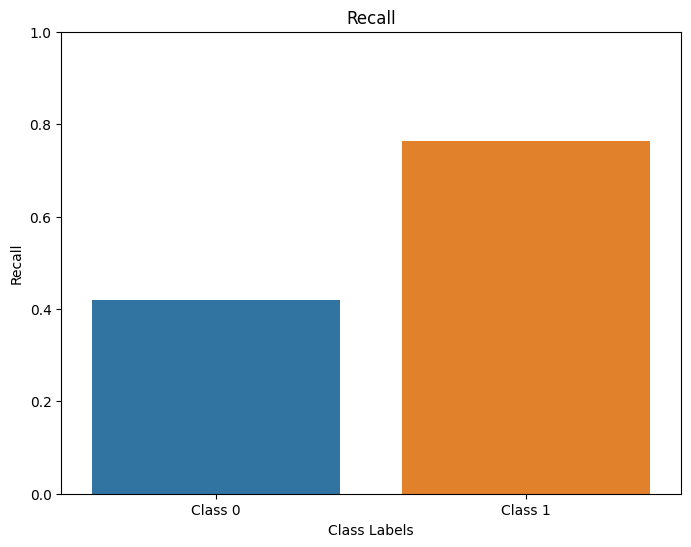

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_predict_finale)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Calculate precision, recall, and F1 score
classification_rep = classification_report(y_test, y_predict_finale, output_dict=True)

# Extract precision and recall for class 0 and class 1
precision_0 = classification_rep['0']['precision']
precision_1 = classification_rep['1']['precision']
recall_0 = classification_rep['0']['recall']
recall_1 = classification_rep['1']['recall']

# Plot the precision and recall
plt.figure(figsize=(8, 6))
sns.barplot(x=[0, 1], y=[precision_0, precision_1])
plt.title("Precision")
plt.xlabel("Class Labels")
plt.ylabel("Precision")
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.ylim([0, 1])
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=[0, 1], y=[recall_0, recall_1])
plt.title("Recall")
plt.xlabel("Class Labels")
plt.ylabel("Recall")
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.ylim([0, 1])
plt.show()



# Linear Regression

In [55]:
import numpy as np
import matplotlib.pyplot as plt

Grafico che mostra l'influenza che possa avere un singola feature, come il numero di immagini contenute nell'articolo, sul numero di condivisioni che questo raggiunge. Mostro il seguente grafico perchè i coefficienti della regressione evidenziano quanto ogni feature contribuisce all'output in combinazione con le altre. Quindi è come se i coefficienti della regressione esprimessero l'importanza relativa di ogni feature nell'influenzare della colonna target (y).

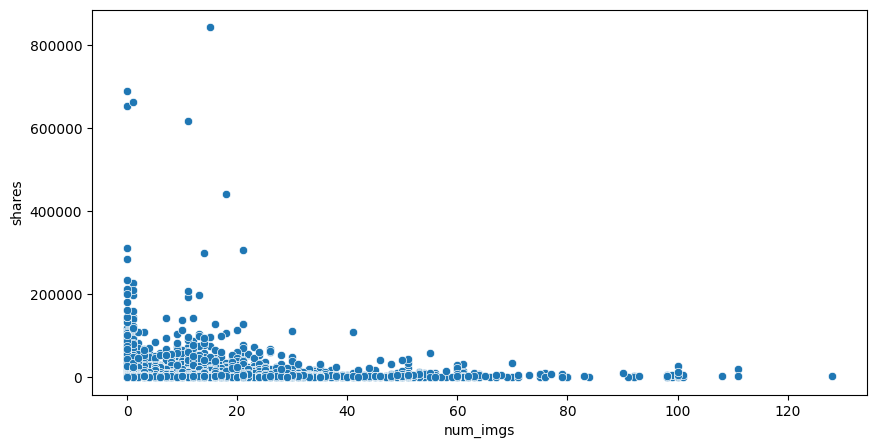

In [56]:
import seaborn as sns
plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='num_imgs', data=df)


Funzioni e algoritmi per la regressione con e senza regolarizzazioni

In [57]:
import numpy as np
import math

def normalize(dati):
  c = list(dati.columns.values)
  media  = np.mean(dati[c], axis=0)
  dev = np.std(dati[c], axis=0)
  dati[c] = (dati[c] - media)/dev
  return dati

########################################################################################################################################

def RMSE(y_pred, y_ground):
      residuals = y_pred - y_ground
      mse = np.mean( pow(residuals,2) ) #calcola la media della distanza al quadrato
      return  math.sqrt(mse) #applica la radice a mse cosi da diventare rmse

########################################################################################################################################

def Gradient_descent_elastic(X, y, w, lambda_val, alpha):
    n = X.shape[0]
    y_pred = X.dot(w)
    residuals = y_pred - y
    grad = (1/n)*X.T.dot(residuals) + lambda_val*(alpha*w + (1-alpha)*2*w)
    return grad

def elastic_net_regression(X_train, y_train, x_test, y_test, learning_rate, epoch, toll, lambda_val, alpha):
    # Aggiungi una colonna di 1 per includere il termine di bias (w0)
    X_train = np.column_stack((np.ones(len(X_train)), X_train))
    x_test = np.column_stack((np.ones(len(x_test)), x_test))
    # Inizializzazione dei coefficienti
    w = np.zeros(X_train.shape[1])
    for i in range(epoch):
        w_old = w
        w = w - learning_rate * Gradient_descent_elastic(X_train, y_train, w, lambda_val, alpha)
        if np.linalg.norm(w - w_old) < toll:
            #print("Raggiunta convergenza")
            break
    y_pred = np.dot(x_test,w)
    rmse = RMSE(y_pred, y_test)

    return w, y_pred

########################################################################################################################################

#per la ridge uso la forma chiusa (ho notato che per la ridge restituisce risultati migliori) invece del Gradient Descent, quindi non serve passargli il learning rate il quale nel GD serve per inidcare di quanto ti muovi sulla derivata
def ridge_regression(x_train, y_train, lambda_val, x_test, y_test): 
    
    x_train = np.column_stack((np.ones(len(x_train)), x_train))
    x_test = np.column_stack((np.ones(len(x_test)), x_test))

    identity = np.eye(x_train.shape[1])
    identity[0, 0] = 0
    XTX = np.dot(x_train.T, x_train) + lambda_val * identity
    
    #calcolo dei coefficenti usando la forma chiusa invece che il gradient descent
    XTy = np.dot(x_train.T, y_train)
    w = np.linalg.solve(XTX, XTy)
    
    # Predizione sui dati di test
    y_pred = np.dot(x_test,w)
    rmse = RMSE(y_pred, y_test)
      
    return w, y_pred

########################################################################################################################################

def lasso_regres(x_train, y_train, lambda_val, x_test, y_test, learning_rate, epoche, toll):
    n = x_train.shape[0]
    x_train = np.column_stack((np.ones(len(x_train)), x_train))
    x_test = np.column_stack((np.ones(len(x_test)), x_test))
    
    w = np.zeros(x_train.shape[1])
   
    for i in range(epoche):
        grad = (1/n) * np.dot(x_train.T, np.dot(x_train, w) - y_train) + lambda_val*np.sign(w)
        
        #aggiorno i coefficenti di peso secondo la regola di aggiornamento dei pesi del gradiant descent 
        w_old = w.copy()
        w = w - learning_rate*grad
        # Controlla se sei arrivato a convergenza
        if np.linalg.norm(w - w_old) < toll:
            #print("LASSO arrivato a convergenza")
            break

    # Predizione sui dati di test
    y_pred = np.dot(x_test,w)
    rmse = RMSE(y_pred, y_test)
     
    return w, y_pred

########################################################################################################################################

def multivariate_regression(X_train, y_train, X_test, y_test, learning_rate, epoche, toll):
    
    def Gradient_descent(X, y, w):
        n = X.shape[0]
        y_pred = X.dot(w)
        residuals = y_pred - y
        grad = (1/n)*X.T.dot(residuals)
        return grad

    # Aggiungere una colonna di 1 per includere il termine di bias (w0)
    X_train = np.column_stack((np.ones(len(X_train)), X_train))
    X_test = np.column_stack((np.ones(len(X_test)), X_test))
    
    
    w = np.zeros(X_train.shape[1])# Inizializzazione dei coefficienti

    for i in range(epoche):
        w_old = w
        w = w - learning_rate * Gradient_descent(X_train, y_train, w)
        if np.linalg.norm(w - w_old) < toll: #fai la normalizzazione per ottenere un valore reale da confrontare con tolleranza 
            #print("arrivato a convergenza")
            break
                                                                                                
    # Predizione sui dati di test
    y_pred = np.dot(X_test,w)
    rmse = RMSE(y_pred, y_test)
    return w, y_pred
    

## Regressione lineare senza regolarizzazione

Risulatati ottenuti attraverso sklearn

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[: , 2:]#elimino prime due col

#sto normalizzando solo le feature lasciando la colonna delle label normale
dati_norm = normalize(dati.iloc[:, :58])     #per aumentare efficenza della regressione lineare normalizzo i valori delle feature
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm, dati.iloc[:, -1], test_size=0.2, random_state=25)

regression = LinearRegression()
regression.fit(x_train_val, y_train_val)
y_pred = regression.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Rmse della regressione lineare senza regolarizzazione :", rmse)


Rmse della regressione lineare senza regolarizzazione : 7321.619039331248


Risulatati ottenuti dal mio algoritmo

In [59]:
from sklearn.model_selection import train_test_split
import itertools

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[: , 2:]#elimino prime due col

#sto normalizzando solo le feature lasciando la colonna delle label normale
dati_norm = normalize(dati.iloc[:, :58])     #per aumentare efficenza della regressione lineare normalizzo i valori delle feature
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm, dati.iloc[:, -1], test_size=0.2, random_state=25)

#75% train , 25% val
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size=0.25, random_state=25)

lambda_values = [ 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000 ]
learning_rate_values = [0.00001, 0.0001, 0.001, 0.01, 0.1]
epoche_values = [1000, 5000]
toll_values = [1e-5,1e-6,1e-7]

k = 3  # Numero di fold per la k-fold validation
num_samples = len(x_val)
fold_size = num_samples // k

rmse_min = np.inf #all'inizio infinito, poi viene sostituito dai migliori
best_combo = []
results = []  # Lista per memorizzare i risultati

combinations = itertools.product(epoche_values, learning_rate_values,toll_values)
#unico iperparametro della ridge è lambda_val dato che usiamo forma chiusa
for epoche , learning_rate, toll in combinations: 
  rmses = []
  for i in range(k):
    # Divisione dei dati in fold di train e validation
    val_start = i * fold_size
    val_end = (i + 1) * fold_size

    x_val_fold = x_val.iloc[val_start:val_end, :]

    y_val_fold = y_val.iloc[val_start:val_end]
    
    x_train_fold = pd.concat([x_train.iloc[:val_start, :], x_train.iloc[val_end:, :]] )
    y_train_fold = pd.concat([y_train.iloc[:val_start], y_train.iloc[val_end:]])
    
    w, y_pred_w = multivariate_regression(x_train_fold, y_train_fold, x_val_fold, y_val_fold, learning_rate, epoche,toll ) #sarebbe meglio calcolarsi fuori rmse e quindi far tornreare da sta funzione solo w e y_predict 

    rmse = RMSE(y_pred_w, y_val_fold)
    rmses.append(rmse)
  
  # Calcolo della media degli RMSE per i fold e memorizzazione dei risultati
  avg_rmse = np.mean(rmses)
  if avg_rmse < rmse_min:
    rmse_min = avg_rmse #cambio il valore di rmse_min sostituiendolo con il minimo trovato fino ad ora 
    best_combo = [] 
    best_combo.append({
        'epochs': epoche,
        'learning_rate': learning_rate,
        'toll':toll,
        'rmse': avg_rmse
    })
    #stampa il valore migliore al momento
    print( "miglior combinazione al momento per no reg regression",best_combo ,"\n")
    
result = best_combo[0]
best_toll_no_reg = result['toll']
best_epoche_no_reg = result['epochs']
best_learning_rate_no_reg = result['learning_rate']
print("best_learning_rate_no_reg" , best_learning_rate_no_reg)
print( "best_epoche_no_reg" , best_epoche_no_reg)
print("best_toll_no_reg",best_toll_no_reg)

w, y_pred_w = multivariate_regression(x_train_val, y_train_val, x_test, y_test, best_learning_rate_no_reg, best_epoche_no_reg,best_toll_no_reg )  
print("errore quadratico medio della no reg regression",RMSE(y_pred_w, y_test),"\n")



miglior combinazione al momento per no reg regression [{'epochs': 1000, 'learning_rate': 1e-05, 'toll': 1e-05, 'rmse': 14790.985302667199}] 

miglior combinazione al momento per no reg regression [{'epochs': 1000, 'learning_rate': 0.0001, 'toll': 1e-05, 'rmse': 14683.054951590291}] 

miglior combinazione al momento per no reg regression [{'epochs': 1000, 'learning_rate': 0.001, 'toll': 1e-05, 'rmse': 14297.615355004082}] 

miglior combinazione al momento per no reg regression [{'epochs': 1000, 'learning_rate': 0.01, 'toll': 1e-05, 'rmse': 14209.956880530975}] 

miglior combinazione al momento per no reg regression [{'epochs': 5000, 'learning_rate': 0.01, 'toll': 1e-05, 'rmse': 14209.25651813291}] 

best_learning_rate_no_reg 0.01
best_epoche_no_reg 5000
best_toll_no_reg 1e-05
errore quadratico medio della no reg regression 7319.1376088405195 



## Regressione lineare con regolarizzazione di Lasso

Risulatati ottenuti attraverso l'implemetazione di sklearn

In [60]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[: , 2:]#elimino prime due col

#sto normalizzando solo le feature lasciando la colonna delle label normale
dati_norm = normalize(dati.iloc[:, :58])     #per aumentare efficenza della regressione lineare normalizzo i valori delle feature
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm, dati.iloc[:, -1], test_size=0.2, random_state=25)
lasso_regression = Lasso()
lasso_regression.fit(x_train_val, y_train_val)
y_pred = lasso_regression.predict(x_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Rmse della regressione lineare senza regolarizzazione :", rmse,"\n")

Rmse della regressione lineare senza regolarizzazione : 7319.52796201016 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.157e+11, tolerance: 4.916e+08
  model = cd_fast.enet_coordinate_descent(


Risultati ottenuti attraverso la mia implementazione

In [61]:
from sklearn.model_selection import train_test_split
import itertools

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[: , 2:]#elimino prime due col

#sto normalizzando solo le feature lasciando la colonna delle label normale
dati_norm = normalize(dati.iloc[:, :58])     #per aumentare efficenza della regressione lineare normalizzo i valori delle feature
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm, dati.iloc[:, -1], test_size=0.2, random_state=25)

#75% train , 25% val
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size=0.25, random_state=25)

lambda_values = [ 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
learning_rate_values = [0.00001, 0.0001, 0.001, 0.01, 0.1]
epoche_values = [50, 100,300]
toll_values = [1e-5,1e-6,1e-7]

k = 3  # Numero di fold per la k-fold validation
num_samples = len(x_val)
fold_size = num_samples // k

rmse_min = np.inf #all'inizio infinito, poi viene sostituito dai migliori
best_combo = []
results = []  # Lista per memorizzare i risultati

combinations = itertools.product(epoche_values, learning_rate_values, lambda_values,toll_values)
#unico iperparametro della ridge è lambda_val dato che usiamo forma chiusa
for epoche , learning_rate , lambda_vals, toll in combinations: 
  rmses = []
  for i in range(k):
    # Divisione dei dati in fold di train e validation
    val_start = i * fold_size
    val_end = (i + 1) * fold_size

    x_val_fold = x_val.iloc[val_start:val_end, :]

    y_val_fold = y_val.iloc[val_start:val_end]
    
    x_train_fold = pd.concat([x_train.iloc[:val_start, :], x_train.iloc[val_end:, :]] )
    y_train_fold = pd.concat([y_train.iloc[:val_start], y_train.iloc[val_end:]])
    
    w_l, y_pred_l = lasso_regres(x_train_fold, y_train_fold, lambda_vals, x_val_fold, y_val_fold, learning_rate, epoche, toll)
    
    rmse = RMSE(y_pred_l, y_val_fold)
    rmses.append(rmse)

  # Calcolo della media degli RMSE per i fold e memorizzazione dei risultati
  avg_rmse = np.mean(rmses)
  if avg_rmse < rmse_min:
    rmse_min = avg_rmse #cambio il valore di rmse_min sostituiendolo con il minimo trovato fino ad ora 
    best_combo = [] 
    best_combo.append({
        'epochs': epoche,
        'learning_rate': learning_rate,
        'lambda_val': lambda_vals,
        'toll':toll,
        'rmse': avg_rmse
    })
    #stampa il valore migliore al momento
    print( "miglior combinazione al momento per lasso regression ",best_combo ,"\n")
    
result = best_combo[0]
best_lambda_lasso = result['lambda_val']
best_epoche_lasso = result['epochs']
best_learning_rate_lasso = result['learning_rate']
best_toll_lasso = result['toll']

print("best_lambda_lasso" ,best_lambda_lasso)
print("best_epoche_lasso" , best_epoche_lasso)
print( "best_learning_rate_lasso" , best_learning_rate_lasso)
print("best_toll_lasso",best_toll_lasso)

w_l, y_pred_l = lasso_regres(x_train_val, y_train_val, best_lambda_lasso, x_test, y_test, best_learning_rate_lasso, best_epoche_lasso, best_toll_lasso)
print("errore quadratico medio della lasso regression",RMSE(y_pred_l, y_test),"\n")


miglior combinazione al momento per lasso regression  [{'epochs': 50, 'learning_rate': 1e-05, 'lambda_val': 0.001, 'toll': 1e-05, 'rmse': 14804.370868202765}] 

miglior combinazione al momento per lasso regression  [{'epochs': 50, 'learning_rate': 0.0001, 'lambda_val': 0.001, 'toll': 1e-05, 'rmse': 14797.974237871187}] 

miglior combinazione al momento per lasso regression  [{'epochs': 50, 'learning_rate': 0.001, 'lambda_val': 0.001, 'toll': 1e-05, 'rmse': 14739.093533917621}] 

miglior combinazione al momento per lasso regression  [{'epochs': 50, 'learning_rate': 0.01, 'lambda_val': 0.001, 'toll': 1e-05, 'rmse': 14422.46568077781}] 

miglior combinazione al momento per lasso regression  [{'epochs': 50, 'learning_rate': 0.1, 'lambda_val': 0.001, 'toll': 1e-05, 'rmse': 14211.811775034226}] 

miglior combinazione al momento per lasso regression  [{'epochs': 50, 'learning_rate': 0.1, 'lambda_val': 0.01, 'toll': 1e-05, 'rmse': 14211.811506842581}] 

miglior combinazione al momento per lass

## Regressione lineare con regolarizzazione di Ridge

Risultati ottenuti da sklearn

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[: , 2:]#elimino prime due col

#sto normalizzando solo le feature lasciando la colonna delle label normale
dati_norm = normalize(dati.iloc[:, :58])     #per aumentare efficenza della regressione lineare normalizzo i valori delle feature

x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm, dati.iloc[:, -1], test_size=0.2, random_state=25)
ridge = Ridge()
ridge.fit(x_train_val,y_train_val)
sklearn_predictions = ridge.predict(x_test)
print("rmse di regressione con ridge regularization calcolato da sklearn",RMSE(y_test,sklearn_predictions))


rmse di regressione con ridge regularization calcolato da sklearn 7321.390215611534


Risulatati ottenuti dal mio algoritmo

In [63]:
from sklearn.model_selection import train_test_split
import itertools

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[: , 2:]#elimino prime due col

#sto normalizzando solo le feature lasciando la colonna delle label normale->se normalizzi pure la ground truth i valori predetti potrebbero venire anche negativi e ovviamente questo non va bene
dati_norm = normalize(dati.iloc[:, :58])     #per aumentare efficenza della regressione lineare normalizzo i valori delle feature
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm, dati.iloc[:, -1], test_size=0.2, random_state=25)

x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size=0.25, random_state=25)

lambda_values = [ 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]

k = 3  # Numero di fold per la k-fold validation
num_samples = len(x_val)
fold_size = num_samples // k
rmse_min = np.inf #all'inizio infinito, poi viene sostituito dai migliori
best_combo = []
results = []  # Lista per memorizzare i risultati

combinations = itertools.product(epoche_values, learning_rate_values, lambda_values)
#unico iperparametro della ridge è lambda_val dato che usiamo forma chiusa
for lambda_vals in lambda_values: 
  rmses = []
  for i in range(k):
    # Divisione dei dati in fold di train e validation
    val_start = i * fold_size
    val_end = (i + 1) * fold_size

    x_val_fold = x_val.iloc[val_start:val_end, :]

    y_val_fold = y_val.iloc[val_start:val_end]
    
    x_train_fold = pd.concat([x_train.iloc[:val_start, :], x_train.iloc[val_end:, :]] )
    y_train_fold = pd.concat([y_train.iloc[:val_start], y_train.iloc[val_end:]])
    
    w_r, y_pred_r = ridge_regression(x_train_fold, y_train_fold, lambda_vals, x_val_fold, y_val_fold)
    rmse = RMSE(y_pred_r, y_val_fold)
    rmses.append(rmse)

  # Calcolo della media degli RMSE per i fold e memorizzazione dei risultati
  avg_rmse = np.mean(rmses)
  if avg_rmse < rmse_min:
    rmse_min = avg_rmse #cambio il valore di rmse_min sostituiendolo con il minimo trovato fino ad ora 
    best_combo = [] 
    best_combo.append({
        'lambda_val': lambda_vals,
        'rmse': avg_rmse
    })
    #stampa il valore migliore al momento
    print( "miglior combinazione al momento per ridge regression ",best_combo ,"\n")
    
result = best_combo[0]
best_lambda_ridge = result['lambda_val']
print("best_lambda_ridge",best_lambda_ridge)

w_r, y_pred_r = ridge_regression(x_train_val, y_train_val, best_lambda_ridge, x_test, y_test)
print("errore quadratico medio della ridge regression ",RMSE(y_pred_r, y_test),"\n")



miglior combinazione al momento per ridge regression  [{'lambda_val': 0.001, 'rmse': 14208.021210960354}] 

best_lambda_ridge 0.001
errore quadratico medio della ridge regression  7321.582510905191 



## Regressione lineare con regolarizzazione Elastic

Risulatati ottenuti attraverso sklearn

In [64]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[: , 2:]#elimino prime due col

dati_norm = normalize(dati.iloc[:, :58])
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm, dati.iloc[:, -1], test_size=0.2, random_state=25)
elastic_regression = ElasticNet()
elastic_regression.fit(x_train_val, y_train_val)
y_pred = elastic_regression.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Errore quadratico medio:", rmse)



Errore quadratico medio: 7331.160349274378


Risulatati ottenuti dal mio algoritmo di regressione lineare con regolarizzazione Elastica

In [65]:
from sklearn.model_selection import train_test_split
import itertools

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[: , 2:]#elimino prime due col

#divisione del dataset: training è 60% dei sample dell'intero dataset, 20%(del totale) testing, 20%(del totale) validation

dati_norm = normalize(dati.iloc[:, :58])     #per aumentare efficenza della regressione lineare normalizzo i valori delle feature
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm, dati.iloc[:, -1], test_size=0.2, random_state=25)

#75% train , 25% val
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size=0.25, random_state=25)

lambda_values = [ 0.001, 0.01, 0.1, 1, 10 ]
learning_rate_values = [0.00001, 0.0001, 0.001, 0.01, 0.1]
epoche_values = [50,100,300]
alpha_values = [ 0.1 , 0.01, 0.001, 0.0001 ]
toll_values = [1e-5,1e-6,1e-7]

k = 3  # Numero di fold per la k-fold validation
num_samples = len(x_val)
fold_size = num_samples // k

rmse_min = np.inf #all'inizio infinito, poi viene sostituito dai migliori
best_combo = []
results = []  # Lista per memorizzare i risultati

combinations = itertools.product(epoche_values, learning_rate_values, alpha_values, lambda_values,toll_values)
#unico iperparametro della ridge è lambda_val dato che usiamo forma chiusa
for epoche , learning_rate, alpha, lambda_val , toll in combinations: 
  rmses = []
  for i in range(k):
    # Divisione dei dati in fold di train e validation
    val_start = i * fold_size
    val_end = (i + 1) * fold_size

    x_val_fold = x_val.iloc[val_start:val_end, :]

    y_val_fold = y_val.iloc[val_start:val_end]
    
    x_train_fold = pd.concat([x_train.iloc[:val_start, :], x_train.iloc[val_end:, :]] )
    y_train_fold = pd.concat([y_train.iloc[:val_start], y_train.iloc[val_end:]])
    
    w_e, y_pred_e = elastic_net_regression(x_train_fold, y_train_fold, x_val_fold, y_val_fold, learning_rate, epoche, toll, lambda_val, alpha)

    rmse = RMSE(y_pred_e, y_val_fold)
    rmses.append(rmse)

  # Calcolo della media degli RMSE per i fold e memorizzazione dei risultati
  avg_rmse = np.mean(rmses)
  if avg_rmse < rmse_min:
    rmse_min = avg_rmse #cambio il valore di rmse_min sostituiendolo con il minimo trovato fino ad ora 
    best_combo = [] 
    best_combo.append({
        'epochs': epoche,
        'learning_rate': learning_rate,
        'alpha': alpha,
        'lambda_val': lambda_val,
        'toll':toll,
        'rmse': avg_rmse
    })
    #stampa il valore migliore al momento
    print( "miglior combinazione al momento per elastic regression ",best_combo ,"\n")
    
result = best_combo[0]
best_learning_rate_elastic= result['learning_rate']
best_epoche_elastic = result['epochs']
best_lambda_val_elastic = result['lambda_val']
best_alpha_elastic = result['alpha']
best_toll_elastic = result['toll']
print("best_learning_rate_elastic" ,best_learning_rate_elastic)
print("best_epoche_elastic" , best_epoche_elastic)
print( "best_lambda_val_elastic" , best_lambda_val_elastic)
print( "best_alpha_elastic" , best_alpha_elastic)
print("best_toll_elastic",best_toll_elastic)

w_e, y_pred_e = elastic_net_regression( x_train_val, y_train_val,x_test, y_test, best_learning_rate_elastic, best_epoche_elastic, best_toll_elastic, best_lambda_val_elastic, best_alpha_elastic)

print("errore quadratico medio della elastic regression",RMSE(y_pred_e, y_test),"\n")


miglior combinazione al momento per elastic regression  [{'epochs': 50, 'learning_rate': 1e-05, 'alpha': 0.1, 'lambda_val': 0.001, 'toll': 1e-05, 'rmse': 14804.370867877311}] 

miglior combinazione al momento per elastic regression  [{'epochs': 50, 'learning_rate': 0.0001, 'alpha': 0.1, 'lambda_val': 0.001, 'toll': 1e-05, 'rmse': 14797.974264360413}] 

miglior combinazione al momento per elastic regression  [{'epochs': 50, 'learning_rate': 0.001, 'alpha': 0.1, 'lambda_val': 0.001, 'toll': 1e-05, 'rmse': 14739.096393419853}] 

miglior combinazione al momento per elastic regression  [{'epochs': 50, 'learning_rate': 0.01, 'alpha': 0.1, 'lambda_val': 0.001, 'toll': 1e-05, 'rmse': 14422.580743084283}] 

miglior combinazione al momento per elastic regression  [{'epochs': 50, 'learning_rate': 0.1, 'alpha': 0.1, 'lambda_val': 0.001, 'toll': 1e-05, 'rmse': 14211.92379502661}] 

miglior combinazione al momento per elastic regression  [{'epochs': 100, 'learning_rate': 0.1, 'alpha': 0.1, 'lambda_v

Confronto fra regressioni lineari

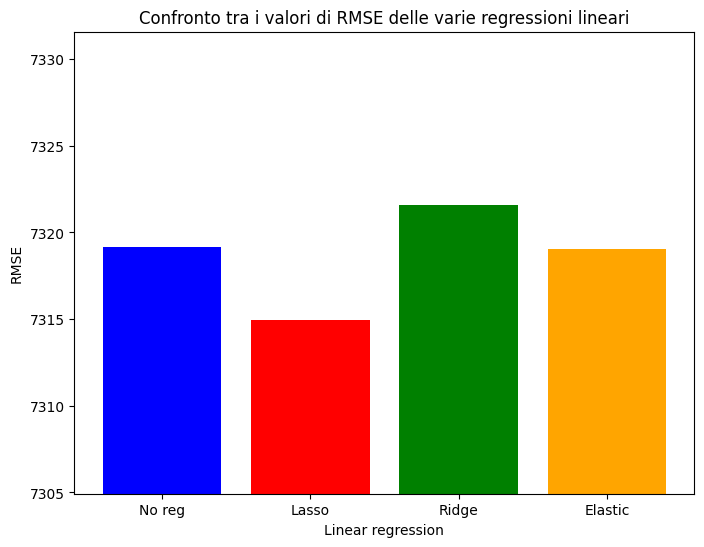

In [66]:
from sklearn.model_selection import train_test_split

def RMSE(y_pred, y_ground):
      residuals = y_pred - y_ground
      mse = np.mean( pow(residuals,2) ) #calcola la media della distanza al quadrato
      return  math.sqrt(mse)

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[: , 2:]#elimino prime due col che non sono predittive

#prima di normalizzare aggiungo la colonna delle ground_truth per la classificazione
dati_norm = normalize(dati.iloc[:, :58]) 

#80% train && val + 20% test
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm, dati.iloc[:, -1], test_size=0.2, random_state=25)

#no reg
w, y_pred_w = multivariate_regression(x_train_val, y_train_val, x_test, y_test, best_learning_rate_no_reg, best_epoche_no_reg,best_toll_no_reg )  
rmse_no_reg = RMSE(y_pred_w, y_test)

#lasso
w_l, y_pred_l = lasso_regres(x_train_val, y_train_val, best_lambda_lasso, x_test, y_test, best_learning_rate_lasso, best_epoche_lasso, best_toll_lasso)
rmse_lasso = RMSE(y_pred_l, y_test)

#ridge
w_r, y_pred_r = ridge_regression(x_train_val, y_train_val, best_lambda_ridge, x_test, y_test)
rmse_ridge = RMSE(y_pred_r, y_test)

#elastic
w_e, y_pred_e = elastic_net_regression( x_train_val, y_train_val,x_test, y_test, best_learning_rate_elastic, best_epoche_elastic, best_toll_elastic, best_lambda_val_elastic, best_alpha_elastic)
rmse_elastic = RMSE(y_pred_e, y_test)

#plot dei valori ottenuti
colors = ['blue', 'red', 'green', 'orange']
rmse_values = [rmse_no_reg, rmse_lasso, rmse_ridge, rmse_elastic]
models = ['No reg', 'Lasso', 'Ridge', 'Elastic']

plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color=colors)
plt.xlabel('Linear regression')
plt.ylabel('RMSE')
plt.title('Confronto tra i valori di RMSE delle varie regressioni lineari')

# Impostazione dei limiti dell'asse y, focus fatto in maniera tale da mostrare le differenze fra le colonne
y_min = min(rmse_values) - 10
y_max = max(rmse_values) + 10
plt.ylim(y_min, y_max)

plt.show()

# Classificazione con Regressione Lineare senza Regolarizzazione, con Lasso, con Ridge, con Elastic 

Il codice fornito contiene alcune funzioni aggiuntive rispetto a quelle descritte in precedenza. Ecco una breve descrizione delle nuove funzioni:

* **Gradient_descent(X, y, w)**: Calcola il gradiente utilizzando il gradiet descent con regressione lineare.

* **linear_regression_classificator(X_train, y_train, learning_rate, epoche, toll)**: Esegue l'algoritmo di regressione lineare con classificazione utilizzando i dati di addestramento , il tasso di apprendimento, il numero massimo di ieterazioni e una tolleranza per la convergenza. Restituisce i coefficienti del modello addestrato.

* **predict_LinRC(x_test, w)**: Effettua previsioni utilizzando un modello di regressione lineare con classificazione addestrato. Restituisce una lista di previsioni binarie. Previsioni si basano su una soglia, se x*w >= 0 la classificazione sarà 1, altrimenti 0

In [67]:
import numpy as np
import math
import matplotlib.pyplot as plt

def ACCURACY(colonna_ground, colonna_prev):   #ACCURACY prende in input colonna delle previsioni e della ground truth, colonna_ground = y_test |  colonna_prev y_prev
  i = 0
  tp_tn = 0
  arr = np.array(colonna_ground.values)
  arr2 = np.array(colonna_prev.values)
  while(i < len(arr2)):                    
    if( arr[i] == arr2[i] ):               
      tp_tn = tp_tn + 1
    i = i + 1
  ac = tp_tn/len(arr)*100
  return ac

def normalize(dati):
  c = list(dati.columns.values)
  media  = np.mean(dati[c], axis=0)
  dev = np.std(dati[c], axis=0)
  dati[c] = (dati[c] - media)/dev
  return dati


####################################################################################################################################################################################################

#funzione per aggiungere nuova colonna
def add_Levelcol(nuovo):
  arr = []                 
  num_rows = nuovo.shape[0]
  i = 0
  while(i < num_rows):
    val = nuovo['shares'][i]
    if(val >= 1400):
      arr.append(1)
    else:
      arr.append(0)
    i = i + 1

  new_col = pd.Series(arr)  #creazione nuova col
  nuovo['Level'] = new_col    #aggiungiamo la nuova colonna al dataframe new
  return nuovo

####################################################################################################################################################################################################

def Gradient_descent_elastic_reg(X, y, w, lambda_val, alpha):
    n = X.shape[0]
    y_pred = X.dot(w)
    residuals = y_pred - y
    grad = (1/n)*X.T.dot(residuals) + lambda_val*(alpha*w + (1-alpha)*2*w)
    return grad

def linear_regression_classificator_elastic_net(X_train, y_train, x_test, y_test, learning_rate, epoch, toll, lambda_val, alpha):
    # Aggiungi una colonna di 1 per includere il termine di bias (w0)
    X_train = np.column_stack((np.ones(len(X_train)), X_train))
    x_test = np.column_stack((np.ones(len(x_test)), x_test))
    # Inizializzazione dei coefficienti
    w = np.zeros(X_train.shape[1])
    for i in range(epoch):
        w_old = w
        w = w - learning_rate * Gradient_descent_elastic_reg(X_train, y_train, w, lambda_val, alpha)
        if np.linalg.norm(w - w_old) < toll:
            #print("Raggiunta convergenza")
            break
    return w

####################################################################################################################################################################################################

def Gradient_descent_ridge_reg(X, y, w, lambda_val):
    n = X.shape[0]
    y_pred = X.dot(w)
    residuals = y_pred - y
    grad = (1/n)*X.T.dot(residuals) + 2*lambda_val*w
    return grad

def linear_regression_classificator_RIDGE(X_train, y_train, learning_rate, epoche, toll,lambda_val):
    # Aggiungere una colonna di 1 per includere il termine di bias (w0)
    X_train = np.column_stack((np.ones(len(X_train)), X_train))
    
    # Inizializzazione dei coefficienti
    w = np.zeros(X_train.shape[1])
    for i in range(epoche):
        w_old = w
        w = w - learning_rate * Gradient_descent_ridge_reg(X_train, y_train, w,lambda_val)
        if np.linalg.norm(w - w_old) < toll: #fai la normalizzazione per ottenere un valore reale da confrontare con tolleranza 
            #print("arrivato a convergenza")
            break                                                                                        
    return w

####################################################################################################################################################################################################

def Gradient_descent_lasso_reg(X, y, w, lambda_val):
        n = X.shape[0]
        y_pred = X.dot(w)
        residuals = y_pred - y
        grad = (1/n)*X.T.dot(residuals) + lambda_val*np.sign(w)
        return grad

def linear_regression_classificator_LASSO(X_train, y_train, learning_rate, epoche, toll,lambda_val):
    # Aggiungere una colonna di 1 per includere il termine di bias (w0)
    X_train = np.column_stack((np.ones(len(X_train)), X_train))
    
    # Inizializzazione dei coefficienti
    w = np.zeros(X_train.shape[1])
    for i in range(epoche):
        w_old = w
        w = w - learning_rate * Gradient_descent_lasso_reg(X_train, y_train, w,lambda_val)
        if np.linalg.norm(w - w_old) < toll: #fai la normalizzazione per ottenere un valore reale da confrontare con tolleranza 
            #print("arrivato a convergenza")
            break                                                                                        
    return w

####################################################################################################################################################################################################

def Gradient_descent(X, y, w):
        n = X.shape[0]
        y_pred = X.dot(w)
        residuals = y_pred - y
        grad = (1/n)*X.T.dot(residuals)
        return grad
     
def linear_regression_classificator(X_train, y_train, learning_rate, epoche, toll):
    # Aggiungere una colonna di 1 per includere il termine di bias (w0)
    X_train = np.column_stack((np.ones(len(X_train)), X_train))
    
    # Inizializzazione dei coefficienti
    w = np.zeros(X_train.shape[1])
    for i in range(epoche):
        w_old = w
        w = w - learning_rate * Gradient_descent(X_train, y_train, w)
        if np.linalg.norm(w - w_old) < toll: #fai la normalizzazione per ottenere un valore reale da confrontare con tolleranza 
            #print("arrivato a convergenza")
            break                                                                                        
    return w

####################################################################################################################################################################################################

#aggiungo le mie previsioni secondo la threshold vista a lezione: se w*x >= 0 allora 1 | se w*x < 0 allora 0
def predict_LinRC(x_test, w):
  x_test = np.column_stack((np.ones(len(x_test)), x_test))
  arrrr = np.array(x_test)        #rendo x_test un array 
  y_previsioni = []
  for i in range(len(arrrr)):
    pr = arrrr[i].dot(w)
    if( pr >= 0 ):
      y_previsioni.append(1)    
    else:
      y_previsioni.append(0)
  return y_previsioni 


## CLASSIFICAZIONE CON LINEAR REGRESSION NO REGULARIZATION

risultato ottenuto grazie alla libreria di sklearn

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[: , 2:]#elimino prime due col che non sono predittive

#prima di normalizzare aggiungo la colonna delle ground_truth per la classificazione
df_with_level = add_Levelcol(dati) 
dati_norm = normalize(df_with_level.copy().iloc[:, :58]) 

x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm.iloc[:, :58], df_with_level.iloc[:, -1], test_size=0.2, random_state=25)

regression = LinearRegression()
regression.fit(x_train_val, y_train_val)

# Ottenere il vettore dei pesi
weights = np.append(regression.intercept_,regression.coef_)

y_pred = predict_LinRC(x_test, weights) #uso la mia funzione 
accuracy = accuracy_score(y_test, y_pred)
print("accuracy della classificazione attraverso regressione lineare senza regolarizzazione attraverso sklearn: ", accuracy*100 ,"%")

accuracy della classificazione attraverso regressione lineare senza regolarizzazione attraverso sklearn:  53.19712447975785 %


Risultato ottenuto dalla mia implementazione

In [69]:
from sklearn.model_selection import train_test_split
import itertools
import numpy as np

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[: , 2:]#elimino prime due col che non sono predittive

#prima di normalizzare aggiungo la colonna delle ground_truth per la classificazione
df_with_level = add_Levelcol(dati) 
dati_norm = normalize(df_with_level.copy().iloc[:, :58]) 

#80% train && val + 20% test
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm.iloc[:, :58], df_with_level.iloc[:, -1], test_size=0.2, random_state=25)

#70% train , 30% val
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size=0.25, random_state=25)

#diversi valori 
epochs_values = [ 50, 100, 300] 
learning_rate_values = [0.00001,0.0001, 0.001,0.01,0.01]   
toll_values = [1e-5,1e-6,1e-7]

k = 3  # Numero di fold per la k-fold validation
num_samples = len(x_val)
fold_size = num_samples // k
accuracy_max = 0 #all'inizio 0, poi viene sostituito dai migliori
best_combo_CL = []
results = []  # Lista per memorizzare i risultati

combinations = itertools.product(epochs_values, learning_rate_values,toll_values)
print("evoluzioni dei risultati migliori durante la model selection:\n")
for epochs, learning_rate ,toll in combinations: 
  acc = [] 
   
  for i in range(k):
      livelli =  []  
      Y_PRED =  []
      Y_TESTING = []

      # Divisione dei dati in fold di train e validation
      val_start = i * fold_size
      val_end = (i + 1) * fold_size

      x_val_fold = x_val.iloc[val_start:val_end, :]
      y_val_fold = y_val.iloc[val_start:val_end]
      
      x_train_fold = pd.concat([x_train.iloc[:val_start, :], x_train.iloc[val_end:, :]] )
      y_train_fold = pd.concat([y_train.iloc[:val_start], y_train.iloc[val_end:]], axis=0)

      w = linear_regression_classificator(x_train_fold, y_train_fold, learning_rate, epochs, toll) 
      y_prev = predict_LinRC(x_val_fold, w)

      livelli = np.array(y_val_fold)  #rendo colonna dei livelli_test un array
      Y_PRED =  pd.Series(y_prev)     #converto in series per funzione accurcy
      Y_TESTING = pd.Series(livelli)

      acc.append( ACCURACY(Y_TESTING,Y_PRED) )

  avg_acc = np.mean(acc)
  if avg_acc > accuracy_max:
    accuracy_max = avg_acc 
    best_combo_CL = [] #resetto la combinazione migliore fino a questo momento
    best_combo_CL.append({
        'epochs': epochs,
        'learning_rate': learning_rate,
        'toll':toll,
        'accuracy': avg_acc
    })
    #stampa il valore migliore al momento
    print( "miglior combinazione al momento ",best_combo_CL ,"\n")
    
# Stampa dei risultati
result = best_combo_CL[0]
print("iperparametri migliori riscontrati durante la cross validation con k-fold k = ", k  ,"\n")
print("Epochs:", result['epochs'],"\nLearning Rate:", result['learning_rate'], "\ntoll", result['toll'],"\naccuracy:",result['accuracy'],"\n")

best_epoche_linRC = result['epochs']
best_learning_rate_linRC= result['learning_rate']
best_toll_linRC = result['toll']

w = linear_regression_classificator(x_train_val, y_train_val, best_learning_rate_linRC, best_epoche_linRC, best_toll_linRC) 
y_prev = predict_LinRC(x_test, w)

livelli = np.array(y_test)  #rendo colonna dei livelli_test un array
Y_PRED =  pd.Series(y_prev)     #converto in series per funzione accurcy
Y_TESTING = pd.Series(livelli)
print("accuracy della classificazione con regressione lineare NO reg finale è:",ACCURACY(Y_TESTING,Y_PRED))



evoluzioni dei risultati migliori durante la model selection:

miglior combinazione al momento  [{'epochs': 50, 'learning_rate': 1e-05, 'toll': 1e-05, 'accuracy': 58.24189683440534}] 

miglior combinazione al momento  [{'epochs': 50, 'learning_rate': 1e-05, 'toll': 1e-06, 'accuracy': 58.254508765291966}] 

iperparametri migliori riscontrati durante la cross validation con k-fold k =  3 

Epochs: 50 
Learning Rate: 1e-05 
toll 1e-06 
accuracy: 58.254508765291966 

accuracy della classificazione con regressione lineare NO reg finale è: 58.27973262706521


## CLASSIFICAZIONE CON LINEAR REGRESSION LASSO REGULARIZATION

In [70]:
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[: , 2:]#elimino prime due col che non sono predittive

df_with_level = add_Levelcol(dati) 
dati_norm = normalize(df_with_level.copy().iloc[:, :58]) 

x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm.iloc[:, :58], df_with_level.iloc[:, -1], test_size=0.2, random_state=25)

regression_lasso = Lasso()
regression_lasso.fit(x_train_val, y_train_val)

# Ottenere il vettore dei pesi
weights_lasso = np.append(regression_lasso.intercept_,regression_lasso.coef_)

y_pred = predict_LinRC(x_test, weights_lasso) #uso la mia funzione 
accuracy = accuracy_score(y_test, y_pred)
print("accuracy della classificazione attraverso regressione lineare con regolarizzazione Lasso attraverso sklearn: ", accuracy*100 ,"%")

accuracy della classificazione attraverso regressione lineare con regolarizzazione Lasso attraverso sklearn:  53.19712447975785 %


In [71]:
from sklearn.model_selection import train_test_split
import itertools
import numpy as np

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[: , 2:]#elimino prime due col che non sono predittive

#prima di normalizzare aggiungo la colonna delle ground_truth per la classificazione
df_with_level = add_Levelcol(dati) 
dati_norm = normalize(df_with_level.copy().iloc[:, :58]) 

#80% train && val + 20% test
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm.iloc[:, :58], df_with_level.iloc[:, -1], test_size=0.2, random_state=25)

#70% train , 30% val
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size=0.25, random_state=25)

#diversi valori 
lambda_values = [ 0.001, 0.01, 0.1, 1, 10 ]
epochs_values = [ 50, 100, 300] 
learning_rate_values = [0.00001,0.0001, 0.001,0.01,0.01]   
toll_values = [1e-5,1e-6,1e-7]

k = 3  # Numero di fold per la k-fold validation
num_samples = len(x_val)
fold_size = num_samples // k
accuracy_max = 0 #all'inizio 0, poi viene sostituito dai migliori
best_combo_CL = []
results = []  # Lista per memorizzare i risultati

combinations = itertools.product(epochs_values, learning_rate_values,toll_values,lambda_values)
print("evoluzioni dei risultati migliori durante la model selection:\n")
for epochs, learning_rate ,toll ,lambda_val in combinations: 
  acc = [] 
   
  for i in range(k):
      livelli =  []  
      Y_PRED =  []
      Y_TESTING = []

      # Divisione dei dati in fold di train e validation
      val_start = i * fold_size
      val_end = (i + 1) * fold_size

      x_val_fold = x_val.iloc[val_start:val_end, :]
      y_val_fold = y_val.iloc[val_start:val_end]
      
      x_train_fold = pd.concat([x_train.iloc[:val_start, :], x_train.iloc[val_end:, :]] )
      y_train_fold = pd.concat([y_train.iloc[:val_start], y_train.iloc[val_end:]], axis=0)
      
      #w = linear_regression_classificator(x_train_fold, y_train_fold, learning_rate, epochs, toll) 
      w = linear_regression_classificator_LASSO(x_train_fold, y_train_fold, learning_rate, epochs, toll,lambda_val)
      y_prev = predict_LinRC(x_val_fold, w)

      livelli = np.array(y_val_fold)  #rendo colonna dei livelli_test un array
      Y_PRED =  pd.Series(y_prev)     #converto in series per funzione accurcy
      Y_TESTING = pd.Series(livelli)

      acc.append( ACCURACY(Y_TESTING,Y_PRED) )

  avg_acc = np.mean(acc)
  if avg_acc > accuracy_max:
    accuracy_max = avg_acc 
    best_combo_CL = [] #resetto la combinazione migliore fino a questo momento
    best_combo_CL.append({
        'epochs': epochs,
        'learning_rate': learning_rate,
        'toll':toll,
        'lambda_val':lambda_val,
        'accuracy': avg_acc
    })
    #stampa il valore migliore al momento
    print( "miglior combinazione al momento ",best_combo_CL ,"\n")
    
# Stampa dei risultati
result = best_combo_CL[0]
print("iperparametri migliori riscontrati durante la cross validation con k-fold k = ", k  ,"\n")
print("Epochs:", result['epochs'],"\nLearning Rate:", result['learning_rate'], "\ntoll", result['toll'],"\nLamda value:" ,result['lambda_val'],"\naccuracy:",result['accuracy'],"\n")

best_epoche_linRC_lasso = result['epochs']
best_learning_rate_linRC_lasso = result['learning_rate']
best_toll_linRC_lasso = result['toll']
best_lambda_result_lasso = result['lambda_val']

w = linear_regression_classificator_LASSO(x_train_val, y_train_val, best_learning_rate_linRC_lasso, best_epoche_linRC_lasso, best_toll_linRC_lasso,best_lambda_result_lasso) 
y_prev = predict_LinRC(x_test, w)

livelli = np.array(y_test)  #rendo colonna dei livelli_test un array
Y_PRED =  pd.Series(y_prev)     #converto in series per funzione accurcy
Y_TESTING = pd.Series(livelli)
print("accuracy della classificazione con regressione lineare CON LASSO REGULARIZATION finale è:",ACCURACY(Y_TESTING,Y_PRED))


evoluzioni dei risultati migliori durante la model selection:

miglior combinazione al momento  [{'epochs': 50, 'learning_rate': 1e-05, 'toll': 1e-05, 'lambda_val': 0.001, 'accuracy': 58.24189683440534}] 

iperparametri migliori riscontrati durante la cross validation con k-fold k =  3 

Epochs: 50 
Learning Rate: 1e-05 
toll 1e-05 
Lamda value: 0.001 
accuracy: 58.24189683440534 

accuracy della classificazione con regressione lineare CON LASSO REGULARIZATION finale è: 58.27973262706521


## CLASSIFICAZIONE CON REGRESSIONE LINEARE CON RIDGE REGULARIZATION

Risultati ottenuti da sklearn

In [72]:
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[: , 2:]#elimino prime due col che non sono predittive

df_with_level = add_Levelcol(dati) 
dati_norm = normalize(df_with_level.copy().iloc[:, :58]) 

x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm.iloc[:, :58], df_with_level.iloc[:, -1], test_size=0.2, random_state=25)

regression_ridge = Ridge()
regression_ridge.fit(x_train_val, y_train_val)

# Ottenere il vettore dei pesi
weights_ridge = np.append(regression_ridge.intercept_,regression_ridge.coef_)

y_pred = predict_LinRC(x_test, weights_ridge) #uso la mia funzione 
accuracy = accuracy_score(y_test, y_pred)
print("accuracy della classificazione attraverso regressione lineare con regolarizzazione Ridge attraverso sklearn: ", accuracy*100 ,"%")


accuracy della classificazione attraverso regressione lineare con regolarizzazione Ridge attraverso sklearn:  53.19712447975785 %


Risultati ottenuti attraverso la mia implementazione

In [73]:
from sklearn.model_selection import train_test_split
import itertools
import numpy as np

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[: , 2:]#elimino prime due col che non sono predittive

#prima di normalizzare aggiungo la colonna delle ground_truth per la classificazione
df_with_level = add_Levelcol(dati) 
dati_norm = normalize(df_with_level.copy().iloc[:, :58]) 

#80% train && val + 20% test
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm.iloc[:, :58], df_with_level.iloc[:, -1], test_size=0.2, random_state=25)

#70% train , 30% val
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size=0.25, random_state=25)

#diversi valori 
lambda_values = [ 0.001, 0.01, 0.1, 1, 10 ]
epochs_values = [ 50, 100, 300] 
learning_rate_values = [0.00001,0.0001, 0.001,0.01,0.01]   
toll_values = [1e-5,1e-6,1e-7]

k = 3  # Numero di fold per la k-fold validation
num_samples = len(x_val)
fold_size = num_samples // k
accuracy_max = 0 #all'inizio 0, poi viene sostituito dai migliori
best_combo_CL = []
results = []  # Lista per memorizzare i risultati

combinations = itertools.product(epochs_values, learning_rate_values,toll_values,lambda_values)
print("evoluzioni dei risultati migliori durante la model selection:\n")
for epochs, learning_rate ,toll ,lambda_val in combinations: 
  acc = [] 
   
  for i in range(k):
      livelli =  []  
      Y_PRED =  []
      Y_TESTING = []

      # Divisione dei dati in fold di train e validation
      val_start = i * fold_size
      val_end = (i + 1) * fold_size

      x_val_fold = x_val.iloc[val_start:val_end, :]
      y_val_fold = y_val.iloc[val_start:val_end]
      
      x_train_fold = pd.concat([x_train.iloc[:val_start, :], x_train.iloc[val_end:, :]] )
      y_train_fold = pd.concat([y_train.iloc[:val_start], y_train.iloc[val_end:]], axis=0)
      
      w = linear_regression_classificator_RIDGE(x_train_fold, y_train_fold, learning_rate, epochs, toll,lambda_val)
      y_prev = predict_LinRC(x_val_fold, w)

      livelli = np.array(y_val_fold)  #rendo colonna dei livelli_test un array
      Y_PRED =  pd.Series(y_prev)     #converto in series per funzione accurcy
      Y_TESTING = pd.Series(livelli)

      acc.append( ACCURACY(Y_TESTING,Y_PRED) )

  avg_acc = np.mean(acc)
  if avg_acc > accuracy_max:
    accuracy_max = avg_acc 
    best_combo_CL = [] #resetto la combinazione migliore fino a questo momento
    best_combo_CL.append({
        'epochs': epochs,
        'learning_rate': learning_rate,
        'toll':toll,
        'lambda_val':lambda_val,
        'accuracy': avg_acc
    })
    #stampa il valore migliore al momento
    print( "miglior combinazione al momento ",best_combo_CL ,"\n")
    
# Stampa dei risultati
result = best_combo_CL[0]
print("iperparametri migliori riscontrati durante la cross validation con k-fold k = ", k  ,"\n")
print("Epochs:", result['epochs'],"\nLearning Rate:", result['learning_rate'], "\ntoll", result['toll'],"\nLamda value:" ,result['lambda_val'],"\naccuracy:",result['accuracy'],"\n")

best_epoche_linRC_ridge = result['epochs']
best_learning_rate_linRC_ridge = result['learning_rate']
best_toll_linRC_ridge = result['toll']
best_lambda_result_ridge = result['lambda_val']

w = linear_regression_classificator_RIDGE(x_train_val, y_train_val, best_learning_rate_linRC_ridge, best_epoche_linRC_ridge, best_toll_linRC_ridge,best_lambda_result_ridge) 
y_prev = predict_LinRC(x_test, w)

livelli = np.array(y_test)  #rendo colonna dei livelli_test un array
Y_PRED =  pd.Series(y_prev)     #converto in series per funzione accurcy
Y_TESTING = pd.Series(livelli)
print("accuracy della classificazione con regressione lineare CON RIDGE REGULARIZATION finale è:",ACCURACY(Y_TESTING,Y_PRED))


evoluzioni dei risultati migliori durante la model selection:

miglior combinazione al momento  [{'epochs': 50, 'learning_rate': 1e-05, 'toll': 1e-05, 'lambda_val': 0.001, 'accuracy': 58.24189683440534}] 

miglior combinazione al momento  [{'epochs': 50, 'learning_rate': 1e-05, 'toll': 1e-06, 'lambda_val': 0.001, 'accuracy': 58.254508765291966}] 

iperparametri migliori riscontrati durante la cross validation con k-fold k =  3 

Epochs: 50 
Learning Rate: 1e-05 
toll 1e-06 
Lamda value: 0.001 
accuracy: 58.254508765291966 

accuracy della classificazione con regressione lineare CON RIDGE REGULARIZATION finale è: 58.27973262706521


## CLASSIFICAZIONE CON REGRESSIONE LINEARE CON ELASTIC REGULARIZATION

risulatati di sklearn

In [74]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[: , 2:]#elimino prime due col che non sono predittive

#prima di normalizzare aggiungo la colonna delle ground_truth per la classificazione
df_with_level = add_Levelcol(dati) 
dati_norm = normalize(df_with_level.copy().iloc[:, :58]) 

x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm.iloc[:, :58], df_with_level.iloc[:, -1], test_size=0.2, random_state=25)

regression_elastic = ElasticNet()
regression_elastic.fit(x_train_val, y_train_val)

# Ottenere il vettore dei pesi
weights_elastic = np.append(regression_elastic.intercept_, regression_elastic.coef_)

y_pred = predict_LinRC(x_test, weights_elastic) #uso la mia funzione 
accuracy = accuracy_score(y_test, y_pred)
print("accuracy della classificazione attraverso regressione lineare senza regolarizzazione attraverso sklearn: ", accuracy*100 ,"%")

accuracy della classificazione attraverso regressione lineare senza regolarizzazione attraverso sklearn:  53.19712447975785 %


Risultati del mio codice

In [75]:
from sklearn.model_selection import train_test_split
import itertools
import numpy as np

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[: , 2:]#elimino prime due col che non sono predittive

#prima di normalizzare aggiungo la colonna delle ground_truth per la classificazione
df_with_level = add_Levelcol(dati) 
dati_norm = normalize(df_with_level.copy().iloc[:, :58]) 

#80% train && val + 20% test
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm.iloc[:, :58], df_with_level.iloc[:, -1], test_size=0.2, random_state=25)

#70% train , 30% val
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size=0.25, random_state=25)

#diversi valori 
lambda_values = [ 0.001, 0.01, 0.1, 1, 10 ]
epochs_values = [ 50, 100, 300] 
learning_rate_values = [0.00001,0.0001, 0.001,0.01,0.01]   
toll_values = [1e-5,1e-6,1e-7]
alpha_values = [ 0.1 , 0.01, 0.001, 0.0001 ]

k = 3  # Numero di fold per la k-fold validation
num_samples = len(x_val)
fold_size = num_samples // k
accuracy_max = 0 #all'inizio 0, poi viene sostituito dai migliori
best_combo_CL = []
results = []  # Lista per memorizzare i risultati

combinations = itertools.product(epoche_values, learning_rate_values, alpha_values, lambda_values,toll_values)
for epoche , learning_rate, alpha, lambda_val , toll in combinations:
  acc = [] 
  for i in range(k):
      livelli =  []  
      Y_PRED =  []
      Y_TESTING = []

      # Divisione dei dati in fold di train e validation
      val_start = i * fold_size
      val_end = (i + 1) * fold_size

      x_val_fold = x_val.iloc[val_start:val_end, :]
      y_val_fold = y_val.iloc[val_start:val_end]
      
      x_train_fold = pd.concat([x_train.iloc[:val_start, :], x_train.iloc[val_end:, :]] )
      y_train_fold = pd.concat([y_train.iloc[:val_start], y_train.iloc[val_end:]], axis=0)
      
      w_e = linear_regression_classificator_elastic_net(x_train_fold, y_train_fold, x_val_fold, y_val_fold, learning_rate, epoche, toll, lambda_val, alpha)
      y_prev = predict_LinRC(x_val_fold, w_e)

      livelli = np.array(y_val_fold)  #rendo colonna dei livelli_test un array
      Y_PRED =  pd.Series(y_prev)     #converto in series per funzione accurcy
      Y_TESTING = pd.Series(livelli)

      acc.append( ACCURACY(Y_TESTING,Y_PRED) )

  avg_acc = np.mean(acc)
  if avg_acc > accuracy_max:
    accuracy_max = avg_acc 
    best_combo_CL = [] #resetto la combinazione migliore fino a questo momento
    best_combo_CL.append({
        'epochs': epoche,
        'learning_rate': learning_rate,
        'alpha': alpha,
        'toll':toll,
        'lambda_val': lambda_val,
        'accuracy': avg_acc
    })
    #stampa il valore migliore al momento
    print( "miglior combinazione al momento ",best_combo_CL ,"\n")
    
# Stampa dei risultati
    
result = best_combo_CL[0]
best_learning_rate_elastic_clas = result['learning_rate']
best_toll_elastic_clas = result['toll']
best_epoche_elastic_clas = result['epochs']
best_lambda_val_elastic_clas = result['lambda_val']
best_alpha_elastic_clas = result['alpha']
print("best_learning_rate_elastic" ,best_learning_rate_elastic_clas)
print("best_epoche_elastic" , best_epoche_elastic_clas)
print( "best_lambda_val_elastic" , best_lambda_val_elastic_clas)
print( "best_alpha_elastic" , best_alpha_elastic_clas)
print("best_toll_elastic_clas",best_toll_elastic_clas)


w_e = linear_regression_classificator_elastic_net(x_train_val, y_train_val, x_test, y_test, best_learning_rate_elastic_clas, best_epoche_elastic_clas, best_toll_elastic_clas, best_lambda_val_elastic_clas, best_alpha_elastic_clas)
y_prev = predict_LinRC(x_test, w_e)

livelli = np.array(y_test)  #rendo colonna dei livelli_test un array
Y_PRED =  pd.Series(y_prev)     #converto in series per funzione accurcy
Y_TESTING = pd.Series(livelli)
print("accuracy della classificazione con regressione lineare CON ELASTIC REGULARIZATION finale è:",ACCURACY(Y_TESTING,Y_PRED))


miglior combinazione al momento  [{'epochs': 50, 'learning_rate': 1e-05, 'alpha': 0.1, 'toll': 1e-05, 'lambda_val': 0.001, 'accuracy': 58.24189683440534}] 

miglior combinazione al momento  [{'epochs': 50, 'learning_rate': 1e-05, 'alpha': 0.1, 'toll': 1e-06, 'lambda_val': 0.001, 'accuracy': 58.254508765291966}] 

best_learning_rate_elastic 1e-05
best_epoche_elastic 50
best_lambda_val_elastic 0.001
best_alpha_elastic 0.1
best_toll_elastic_clas 1e-06
accuracy della classificazione con regressione lineare CON ELASTIC REGULARIZATION finale è: 58.27973262706521


#Classificazione con Regressione Logistica

Il codice sottostante è composto da varie funzioni che servono allo sviluppolo dell'algoritmo per la classificazione mediante regressione logistica
Ecco una breve descrizione delle funzioni:

* **ACCURACY(colonna_ground, colonna_prev)**: Calcola l'accuratezza delle previsioni fatte basandosi sul modello realizzato con i dati di allenamento confrontando una colonna di valori di riferimento con la colonna delle previsioni

* **add_Levelcol(nuovo)**: Aggiunge una colonna chiamata "Level" a un dataframe basata sui valori della colonna "shares". Se un valore è maggiore o uguale a 1400, viene assegnato 1, altrimenti viene assegnato 0.

* **normalize(dati)**: Normalizza i dati in un dataframe calcolando la media e la deviazione standard di ogni colonna e successivamente sottraendo la media e dividendo per la deviazione standard.

* **cost_function(y_pred, y)**: Calcola la funzione di costo per un modello di regressione logistica utilizzando le previsioni e i valori di riferimento come input.

* **sigmoid(z)**: Calcola la funzione sigmoide di un valore z.

* **logistic_regression(x_train, y_train, learning_rate, epoche, toll)**: Esegue l'algoritmo di regressione logistica sfruttando i dati di addestramento, il learning_rate, il numero massimo di iterazioni (epoche) e una tolleranza per comprendere la convergenza. Restituisce i pesi del modello addestrato.

* **predict_LogRC(x_test, w)**: Effettua previsioni utilizzando un modello di regressione logistica addestrato su un insieme di samples. Restituisce una lista di previsioni binarie, cioè la classificazione prevista per i dati forniti in input.


In [76]:
def ACCURACY(colonna_ground, colonna_prev):   #ACCURACY prende in input colonna delle previsioni e della ground truth, colonna_ground = y_test |  colonna_prev y_prev
  i = 0
  tp_tn = 0
  arr = np.array(colonna_ground.values)
  arr2 = np.array(colonna_prev.values)
  while(i < len(arr2)):                     #devi fare la len su arr2 perche questi sono i test che sono solo il 20% del totale
    if( arr[i] == arr2[i] ):               
      tp_tn = tp_tn + 1
    i = i + 1
  ac = tp_tn/len(arr)*100
  return ac

########################################################################################################################################################################################

def add_Levelcol(nuovo):
  arr = []                 
  num_rows = nuovo.shape[0]
  i = 0
  while(i < num_rows):
    val = nuovo['shares'][i]
    if(val >= 1400):
      arr.append(1)
    else:
      arr.append(0)
    i = i + 1

  new_col = pd.Series(arr)  #creazione nuova col
  nuovo['Level'] = new_col    #aggiungiamo la nuova colonna al dataframe new
  return nuovo

########################################################################################################################################################################################

def normalize(dati):
  c = list(dati.columns.values)
  media  = np.mean(dati[c], axis=0)
  dev = np.std(dati[c], axis=0)
  dati[c] = (dati[c] - media)/dev
  return dati

########################################################################################################################################################################################

def cost_function(y_pred, y):
    cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

########################################################################################################################################################################################

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

########################################################################################################################################################################################

def logistic_regression(x_train, y_train, learning_rate, epoche, toll):
    
    n = y_train.shape[0]
    w = np.zeros(x_train.shape[1])
    bias = 0
    for i in range(epoche):
      z = x_train.dot(w) 
      y_pred = sigmoid(z)
      w = w - (1/n) * learning_rate * np.dot(x_train.T, y_pred - y_train)
      bias = bias - (1/n) * learning_rate * np.sum( y_pred - y_train)

    return w,bias
  
########################################################################################################################################################################################

def predict_LogRC(x_test, w):
    x_test = np.hstack((x_test, np.ones((len(x_test), 1))))#aggiungo colonna di bias
    arr = np.array(x_test)  
    y_previsioni = []
    for i in range(len(arr)):
      z = arr[i].dot(w)#sarebbe hyp
      pr = sigmoid(z)
      if(pr > 0.5):
        y_previsioni.append(1)
      else:
        y_previsioni.append(0)
    
    return y_previsioni

def predict_LogRC_con_bias(x_test, w, b):
    arr = np.array(x_test)
    y_previsioni = []
    for i in range(len(arr)):
        z = np.dot(arr[i], w) + b
        pr = sigmoid(z)
        if pr > 0.5:
            y_previsioni.append(1)
        else:
            y_previsioni.append(0)

    return y_previsioni
    

risultati del codice sfruttando sklearn

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[: , 2:]#elimino prime due col che non sono predittive

#prima di normalizzare aggiungo la colonna delle ground_truth per la classificazione
df_with_level = add_Levelcol(dati) 
dati_norm = normalize(df_with_level.copy().iloc[:, :58]) 

#80% train && val + 20% test
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm.iloc[:, :58], df_with_level.iloc[:, -1], test_size=0.2, random_state=25)

# Crea il modello di regressione logistica
logreg = LogisticRegression()

# Addestra il modello sui dati di addestramento
logreg.fit(x_train_val, y_train_val)

# Ottenere il vettore dei pesi
weights_log = np.append(logreg.coef_,logreg.intercept_)

y_pred = predict_LogRC(x_test, weights_log) #uso la mia funzione 
accuracy = accuracy_score(y_test, y_pred)
print("accuracy della classificazione attraverso regressione Logaritmica senza regolarizzazione attraverso sklearn: ", accuracy*100 ,"%")

accuracy della classificazione attraverso regressione Logaritmica senza regolarizzazione attraverso sklearn:  65.29196620002521 %


Risualtati del mio codice

In [78]:
from sklearn.model_selection import train_test_split
import itertools
import numpy as np

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[: , 2:]#elimino prime due col che non sono predittive

#prima di normalizzare aggiungo la colonna delle ground_truth per la classificazione
df_with_level = add_Levelcol(dati) 
dati_norm = normalize(df_with_level.copy().iloc[:, :58]) 

#80% train && val + 20% test
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm.iloc[:, :58], df_with_level.iloc[:, -1], test_size=0.2, random_state=25)

#70% train , 30% val
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size=0.25, random_state=25)

#diversi valori 
epochs_values = [ 50, 100, 300] 
learning_rate_values = [0.00001,0.0001, 0.001,0.01,0.01]   
toll_values = [1e-5,1e-6,1e-7]

k = 3  # Numero di fold per la k-fold validation
num_samples = len(x_val)
fold_size = num_samples // k
accuracy_max = 0 #all'inizio 0, poi viene sostituito dai migliori
best_combo_CL = []
results = []  # Lista per memorizzare i risultati

combinations = itertools.product(epochs_values, learning_rate_values, toll_values)
print("evoluzioni dei risultati migliori durante la model selection:\n")
for epochs, learning_rate, toll in combinations: 
  acc = []  
  for i in range(k):
      livelli =  []  
      Y_PRED =  []
      Y_TESTING = []

      # Divisione dei dati in fold di train e validation
      val_start = i * fold_size
      val_end = (i + 1) * fold_size

      x_val_fold = x_val.iloc[val_start:val_end, :]
      y_val_fold = y_val.iloc[val_start:val_end]
      
      x_train_fold = pd.concat([x_train.iloc[:val_start, :], x_train.iloc[val_end:, :]] )
      y_train_fold = pd.concat([y_train.iloc[:val_start], y_train.iloc[val_end:]], axis=0)
      
      w, b = logistic_regression(x_train_fold, y_train_fold, learning_rate, epochs, toll) 
      y_prev = predict_LogRC_con_bias(x_val_fold, w,b)

      livelli = np.array(y_val_fold)  #rendo colonna dei livelli_test un array
      Y_PRED =  pd.Series(y_prev)     #converto in series per funzione accurcy
      Y_TESTING = pd.Series(livelli)

      acc.append( ACCURACY(Y_TESTING,Y_PRED) )

  avg_acc = np.mean(acc)
  if avg_acc > accuracy_max:
    accuracy_max = avg_acc 
    best_combo_CL = [] #resetto la combinazione migliore fino a questo momento
    best_combo_CL.append({
        'epochs': epochs,
        'learning_rate': learning_rate,
        'toll': toll,
        'accuracy': avg_acc
    })
    #stampa il valore migliore al momento
    print( "miglior combinazione al momento ",best_combo_CL ,"\n")
    
# Stampa dei risultati
result = best_combo_CL[0]
print("iperparametri migliori riscontrati durante la cross validation con k-fold k = ", k  ,"\n")
print("Epochs:", result['epochs'],"\nToll:",result['toll'],"\nLearning Rate:",   result['learning_rate'],"\naccuracy:",result['accuracy'])

best_epoche_log = result['epochs']
best_learning_rate_log = result['learning_rate']
best_toll_log = result['toll']

w,b = logistic_regression(x_train_val, y_train_val, best_learning_rate_log, best_epoche_log, best_toll_log) 
y_prev = predict_LogRC_con_bias(x_test, w,b)

livelli = np.array(y_test)  #rendo colonna dei livelli_test un array
Y_PRED =  pd.Series(y_prev)     #converto in series per funzione accurcy
Y_TESTING = pd.Series(livelli)
print("accuracy della classificazione con regressione logistica finale è:",ACCURACY(Y_TESTING,Y_PRED))



evoluzioni dei risultati migliori durante la model selection:

miglior combinazione al momento  [{'epochs': 50, 'learning_rate': 1e-05, 'toll': 1e-05, 'accuracy': 63.21099760373314}] 

miglior combinazione al momento  [{'epochs': 50, 'learning_rate': 0.001, 'toll': 1e-05, 'accuracy': 63.2614453272796}] 

miglior combinazione al momento  [{'epochs': 50, 'learning_rate': 0.01, 'toll': 1e-05, 'accuracy': 63.69025097742465}] 

miglior combinazione al momento  [{'epochs': 100, 'learning_rate': 0.01, 'toll': 1e-05, 'accuracy': 63.95510152604364}] 

miglior combinazione al momento  [{'epochs': 300, 'learning_rate': 0.01, 'toll': 1e-05, 'accuracy': 64.71181737924077}] 

iperparametri migliori riscontrati durante la cross validation con k-fold k =  3 

Epochs: 300 
Toll: 1e-05 
Learning Rate: 0.01 
accuracy: 64.71181737924077
accuracy della classificazione con regressione logistica finale è: 64.10644469668306


#Classificazione con K Nearest Neighbor


* **ACCURACY(colonna_ground, colonna_prev)**: Calcola l'accuratezza delle previsioni fatte basandosi sul modello realizzato con i dati di allenamento confrontando una colonna di valori di riferimento con la colonna delle previsioni

* **add_Levelcol(nuovo)**: Aggiunge una colonna chiamata "Level" a un dataframe basata sui valori della colonna "shares". Se un valore è maggiore o uguale a 1400, viene assegnato 1, altrimenti viene assegnato 0.

* La funzione **packed_predict_classification(x_train, y_train, sample, k)** : Calcola la distanza euclidea tra il campione di test (sample) e tutte le righe dei dati di allenamento. Viene utilizzata la funzione cdist di scipy.spatial.distance per calcolare le distanze euclidee. Identifica i k vicini più vicini al campione di test, poi ottiene gli indici dei k vicini che hanno le distanze più basse rispetto al campione di test per poi prendere le loro ground truth. Calcola l'occorrenza più frequente tra le label dei vicini e usa la funzione bincount per calcolare il numero delle occorrenze delle diverse etichette di classe e resituisce eitchetta che ha maggiore numero di occorrenze fra i vicini. 


In [79]:
import numpy as np
import math

#funzione per aggiungere nuova colonna
def add_Levelcol(nuovo):
  arr = []                 
  num_rows = nuovo.shape[0]
  i = 0
  while(i < num_rows):
    val = nuovo['shares'][i]
    if(val >= 1400):
      arr.append(1)
    else:
      arr.append(0)
    i = i + 1

  new_col = pd.Series(arr)  #creazione nuova col
  nuovo['Level'] = new_col    #aggiungiamo la nuova colonna al dataframe new
  return nuovo

def ACCURACY(colonna_ground, colonna_prev):   #ACCURACY prende in input colonna delle previsioni e della ground truth, colonna_ground = y_test |  colonna_prev y_prev
  i = 0
  tp_tn = 0
  arr = np.array(colonna_ground.values)
  arr2 = np.array(colonna_prev.values)
  while(i < len(arr2)):                     #devi fare la len su arr2 perche questi sono i test che sono solo il 20% del totale
    if( arr[i] == arr2[i] ):               
      tp_tn = tp_tn + 1
    i = i + 1
  ac = tp_tn/len(arr)*100
  return ac

from scipy.spatial.distance import cdist #uso questa libreria per calcolare le distanze euclidee fra sample 

def packed_predict_classification(x_train, y_train, sample, k):
    distances = cdist([sample], x_train)[0] #Calcolo la distanza fra sample e tutte le righe di x_train
    neighbors_idx = np.argpartition(distances,k-1)[:k] #ottengo gli indici dei k vicini più stretti 
    neighbors = y_train[neighbors_idx] #mi prendo le loro ground_truth
    max_occurrence = np.bincount(neighbors) #restituisce occorrenza più frquente di neighbors
    return np.argmax(max_occurrence)

####################################################################################################


dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[:, 2:] 

dati = add_Levelcol(dati)

#80% train && val + 20% test
x_train_val, x_test, y_train_val, y_test = train_test_split(dati.iloc[:, :58], dati.iloc[:, -1], test_size=0.2, random_state=25)

#75% train , 25% val
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size=0.25, random_state=25)

y_train_valori = y_train.values
y_val_valori = y_val.values
k_valori = [3,5,7,9,11,13,15]
acc_best = 0
k_best = 0
for k_esimo in k_valori: 
  prev = []
  for index in range(x_val.shape[0]):
    sample = x_val.iloc[index,:].values
    predizione  = packed_predict_classification( x_train, y_train_valori, sample, k_esimo)
    prev.append(predizione)

  Y_PRED =  pd.Series(prev)
  Y_TESTING = pd.Series(y_val_valori)

  acc = ACCURACY(Y_TESTING,Y_PRED)
  print("con k pari a: ",k_esimo ," accuracy viene:", acc)
  if acc > acc_best:
    k_best = k_esimo
    acc_best = acc


print("miglior valore di k è: ", k_best)
k_best_for_knn_class = k_best
y_lev_train_val = y_train_val.values
y_lev_test = y_test.values
prev = []

for index in range(x_test.shape[0]):
  sample = x_test.iloc[index,:].values
  predizione  = packed_predict_classification( x_train_val, y_lev_train_val, sample, k_best_for_knn_class)
  #print("pred",predizione, "ground_truth", y_lev_test[index] )
  #print(index)
  prev.append(predizione)

Y_PRED =  pd.Series(prev)
Y_TESTING = pd.Series(y_lev_test)

acc = ACCURACY(Y_TESTING,Y_PRED)
print("\nACCURACY DEL k NN CLASSIFICATOR è E':",acc,"%") 

con k pari a:  3  accuracy viene: 56.514062302938584
con k pari a:  5  accuracy viene: 57.434733257661755
con k pari a:  7  accuracy viene: 57.95182242401312
con k pari a:  9  accuracy viene: 58.12838945642578
con k pari a:  11  accuracy viene: 58.342792281498305
con k pari a:  13  accuracy viene: 58.63286669189053
con k pari a:  15  accuracy viene: 58.20406104174549
miglior valore di k è:  13

ACCURACY DEL k NN CLASSIFICATOR è E': 58.29234455795182 %


risulatati di sklearn

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import math

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[:, 2:] 
dati = add_Levelcol(dati)

x_train_val, x_test, y_train_val, y_test = train_test_split(dati.iloc[:, :58], dati.iloc[:, -1], test_size=0.2, random_state=25)
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size=0.25, random_state=25)

best_k = 0
best_Accuracy = 0
k_valori = [3,5,7,9,11,13,15]
for k in k_valori:
  accuracy_tmp = 0
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_val)
  accuracy_tmp = accuracy_score(y_val, y_pred)
  #print("con k pari a: ",k ," accuracy viene:", accuracy_tmp*100)
  if accuracy_tmp > best_Accuracy:
    best_Accuracy = accuracy_tmp
    best_k = k

print("migliore k è:",best_k)
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train_val, y_train_val)
y_pred = knn.predict(x_test)
# Calcolo dell'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print("Accuratezza del classificatore KNN:", accuracy*100)



migliore k è: 13
Accuratezza del classificatore KNN: 58.29234455795182


#Regressione con K Nearest Neighbor


* La funzione **packed_predict_classification(x_train, y_train, sample, k)** : è identica a quella usata per la classificazione con knn però invece che calcolare l'occorrenza più frequente tra le label dei vicini, fa una media delle label dei vicini e la previsione per il sample corrente sarà proprio la media delle ground truth dei suoi vicini.

In [81]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
import itertools

def RMSE(y_pred, y_ground):
      residuals = y_pred - y_ground
      mse = np.mean( pow(residuals,2) ) #calcola la media della distanza al quadrato
      return  math.sqrt(mse)

#########################################################################################################

def normalize_knn(data):
  c = list(data.columns.values)
  media  = np.mean(data[c], axis=0)
  dev = np.std(data[c], axis=0)
  data[c] = (data[c] - media)/dev
  return data

###############################################################################################

from scipy.spatial.distance import cdist #libreria importata per effettuare il calcolo della distanza in maniera efficente, versioni precedenti troppo lente (oltre 1h)
from sklearn.model_selection import train_test_split


def packed_predict_regression(x_train, y_train, sample, k):
    distances = cdist([sample], x_train)[0] #Calcolo la distanza fra sample e tutte le righe di x_train
    neighbors_idx = np.argpartition(distances,k-1)[:k] #ottengo gli indici dei k vicini più stretti 
    neighbors = y_train[neighbors_idx] #mi prendo le loro ground_truth
    prediction = np.average(neighbors) #ci faccio la media
    return prediction


dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[:, 2:] #abbiamo tolto le colonne non predittive

dati_norm = normalize_knn(dati.iloc[:,:58]) 
#80% train && val + 20% test
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm, dati.iloc[:, -1], test_size=0.2, random_state=25)

#75% train , 25% val
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size=0.25, random_state=25)

y_train_valori = y_train.values
y_val_valori = y_val.values
k_valori = [3,5,7,9,11,13,15,17,19]
rmse_best = np.inf
k_best = 0
for k_esimo in k_valori: 
  prev = []
  for index in range(x_val.shape[0]):
    sample = x_val.iloc[index,:].values
    predizione  = packed_predict_regression( x_train, y_train_valori, sample, k_esimo)
    #print("pred",predizione, "ground_truth", y_test_val[index] )
    #print(index) 
    prev.append(predizione)

  rmse = RMSE(prev,y_val_valori)
  print("con k pari a: ",k_esimo ," rmse viene:", rmse)
  if rmse < rmse_best:
    print("Al momento il migliore k è", k_esimo , " con un rmse:", rmse )
    rmse_best = rmse
    k_best = k_esimo


k_migliore_knn_regressione = k_best # preso dai validation
print("miglior valore di k è: ", k_best)

#il test finale va fatto confrontando un sample con il dataset di train + val per cercare i suoi vicini
y_train_val_valori = y_train_val.values
y_test_valori = y_test.values
prev = []

for index in range(x_test.shape[0]):
  sample = x_test.iloc[index,:].values
  predizione  = packed_predict_regression( x_train_val, y_train_val_valori, sample, k_migliore_knn_regressione)
  #print("pred",predizione, "ground_truth", y_test_val[index] )
  #print(index) 
  prev.append(predizione)

rmse = RMSE(prev,y_test_valori)
print("rmse", rmse)


con k pari a:  3  rmse viene: 16091.198399690049
Al momento il migliore k è 3  con un rmse: 16091.198399690049
con k pari a:  5  rmse viene: 15738.908787576891
Al momento il migliore k è 5  con un rmse: 15738.908787576891
con k pari a:  7  rmse viene: 15589.137211003577
Al momento il migliore k è 7  con un rmse: 15589.137211003577
con k pari a:  9  rmse viene: 15500.443933487433
Al momento il migliore k è 9  con un rmse: 15500.443933487433
con k pari a:  11  rmse viene: 15469.150965164965
Al momento il migliore k è 11  con un rmse: 15469.150965164965
con k pari a:  13  rmse viene: 15436.511446290264
Al momento il migliore k è 13  con un rmse: 15436.511446290264
con k pari a:  15  rmse viene: 15419.676759353724
Al momento il migliore k è 15  con un rmse: 15419.676759353724
con k pari a:  17  rmse viene: 15411.573377282566
Al momento il migliore k è 17  con un rmse: 15411.573377282566
con k pari a:  19  rmse viene: 15389.137594095431
Al momento il migliore k è 19  con un rmse: 15389.1375

In [82]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[:, 2:]

dati_norm = normalize_knn(dati.iloc[:,:58]) 

x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm, dati.iloc[:, -1], test_size=0.2, random_state=25)

x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size=0.25, random_state=25)

best_k = 0
best_rmse = np.inf

k_valori = [3,5,7,9,11,13,15]
for k in k_valori:
  rmse = 0
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_val)

  rmse = np.sqrt(mean_squared_error(y_val, y_pred))
  print("Con k =",k,"Root Mean Squared Error del regressore KNN:", rmse)
  if rmse < best_rmse:
    best_k = k
    best_rmse = rmse

print("\nil migliore k è:", best_k)
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(x_train_val, y_train_val)
y_pred = knn.predict(x_test)
rmse_finale = np.sqrt(mean_squared_error(y_test, y_pred))
print("rmse finale è :",rmse_finale)



Con k = 3 Root Mean Squared Error del regressore KNN: 16091.198399690049
Con k = 5 Root Mean Squared Error del regressore KNN: 15738.908787576891
Con k = 7 Root Mean Squared Error del regressore KNN: 15589.137211003577
Con k = 9 Root Mean Squared Error del regressore KNN: 15500.443933487433
Con k = 11 Root Mean Squared Error del regressore KNN: 15469.150965164965
Con k = 13 Root Mean Squared Error del regressore KNN: 15436.511446290264
Con k = 15 Root Mean Squared Error del regressore KNN: 15419.676759353724

il migliore k è: 15
rmse finale è : 7749.804182566208


# Classificazione con Neural Network

Le funzionalità principali del blocco di codice sottostante sono:
* Classe NeuralNetwork: All'interno della classe, vengono definite le funzioni per la sigmoidale, il calcolo della sua derivata, la forward e back propagation e il metodo di addestramento della rete. Viene anche definito un metodo per effettuare previsioni.

* Ciclo per la ricerca degli iperparametri: Ho importato la libreria itertools per creare tutte le combinazioni di iperparametri per la scelta del modello. Viene eseguita una k-fold validation per ogni combinazione di iperparametri. Durante il ciclo, viene calcolata l'accuratezza media per ogni combinazione e viene memorizzata la combinazione con l'accuratezza più alta.

* Addestramento finale e valutazione: Viene creata una nuova istanza della classe NeuralNetwork utilizzando i migliori iperparametri trovati. Viene eseguito l'addestramento finale utilizzando l'unione del training_set e validation_set e viene effettuata la previsione su test_set. Viene calcolata l'accuratezza finale e viene stampato il risultato.

In [104]:
import numpy as np
from sklearn.model_selection import train_test_split
import itertools

#funzione per aggiungere nuova colonna
def add_Levelcol(nuovo):
  arr = []                 
  num_rows = nuovo.shape[0]
  i = 0
  while(i < num_rows):
    val = nuovo['shares'][i]
    if(val >= 1400):
      arr.append(1)
    else:
      arr.append(0)
    i = i + 1

  new_col = pd.Series(arr)  #creazione nuova col
  nuovo['Level'] = new_col    #aggiungiamo la nuova colonna al dataframe new
  return nuovo

def ACCURACY(colonna_ground, colonna_prev):   #ACCURACY prende in input colonna delle previsioni e della ground truth, colonna_ground = y_test |  colonna_prev y_prev
  i = 0
  tp_tn = 0
  arr = np.array(colonna_ground.values)
  arr2 = np.array(colonna_prev.values)
  while(i < len(arr2)):                     #devi fare la len su arr2 perche questi sono i test che sono solo il 20% del totale
    if( arr[i] == arr2[i] ):               
      tp_tn = tp_tn + 1
    i = i + 1
  ac = tp_tn/len(arr)*100
  return ac

################################################################################################################################

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Inizializzazione dei pesi li metto random
        self.weights1 = np.random.randn(self.input_size, self.hidden_size) #w1 pesi che connettono gli input ai neuroni dello strato in mezzo.
        self.weights2 = np.random.randn(self.hidden_size, self.output_size) #w2 pesi che connettono i neuroni dello strato nascosto all'uscita.
      
        # Inizializzazione dei bias
        self.bias1 = np.zeros((1, self.hidden_size))
        self.bias2 = np.zeros((1, self.output_size))
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, X):
        #sigmoide
        self.hidden_layer = self.sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output_layer = self.sigmoid(np.dot(self.hidden_layer, self.weights2) + self.bias2)
        return self.output_layer
    
    def backward(self, X, y, output, learning_rate):
        # Calcolo errore
        error_output = y - output
        error_hidden = np.dot(error_output, self.weights2.T) * self.sigmoid_derivative(self.hidden_layer)
        #aggiorno pesi e bias
        self.weights2 += learning_rate * np.dot(self.hidden_layer.T, error_output) 
        self.weights1 += learning_rate * np.dot(X.T, error_hidden)
        self.bias2 += learning_rate * np.sum(error_output, axis=0, keepdims=True)
        self.bias1 += learning_rate * np.sum(error_hidden, axis=0)
        
    def train(self, X, y, epochs, learning_rate):
        for i in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)
            
    def predict_NNcl(self, X):
        output = self.forward(X)
        predictions = np.round(output) #su livello output applico sigmoide allora uso lo stessa trashold di regressione logistica (0.5) quindi è come se dovessi arrotondare 
        return predictions

def normalize(data):
  c = list(data.columns.values)
  media  = np.mean(data[c], axis=0)
  dev = np.std(data[c], axis=0)
  data[c] = (data[c] - media)/dev
  return data
  
################################################################################################################################

dati_NNCL = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati_NNCL = dati_NNCL.rename(columns=lambda x: x.strip())
dati_NNCL = dati_NNCL.iloc[:,2:]
dati_NNCL = add_Levelcol(dati_NNCL)
dati_NN_CL_norm = normalize(dati_NNCL.iloc[:, :58])


#80% train && val + 20% test
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_NN_CL_norm.iloc[:, :58], dati_NNCL.iloc[:, -1], test_size=0.2, random_state=25)

#70% train , 30% val
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size=0.25, random_state=25)

#diversi valori 
epochs_values = [100 ,200]
learning_rate_values = [0.0001, 0.001, 0.01, 0.1]  
hidden_size_values = [5, 10, 30, 50]  

k = 3  # Numero di fold per la k-fold validation
num_samples = len(x_val)
fold_size = num_samples // k
accuracy_max = 0 #all'inizio 0, poi viene sostituito dai migliori
best_combo_CL = []
results = []  # Lista per memorizzare i risultati
output_size = 1

combinations = itertools.product(epochs_values, learning_rate_values, hidden_size_values)
print("evoluzioni dei risultati migliori durante la model selection:\n")
for epochs, learning_rate, hidden_size in combinations: #invece di fare 3 cicli for annidati con la libreria itertools mi sono calcolato tutte le possibili combinazioni di iperparametri e le scandisco
  acc = []  
  for i in range(k):
      livelli =  []  
      Y_PRED =  []
      Y_TESTING = []

      # Divisione dei dati in fold di train e validation
      val_start = i * fold_size
      val_end = (i + 1) * fold_size

      x_val_fold = x_val.iloc[val_start:val_end, :]
      y_val_fold = y_val.iloc[val_start:val_end]
      
      x_train_fold = pd.concat([x_train.iloc[:val_start, :], x_train.iloc[val_end:, :]] )
      y_train_fold = pd.concat([y_train.iloc[:val_start], y_train.iloc[val_end:]], axis=0)
      
      y_train_fold = y_train_fold.values.reshape((x_train_fold.shape[0], 1))
    
      input_size = x_train_fold.shape[1]
      nn = NeuralNetwork(input_size, hidden_size, output_size)
      nn.train(x_train_fold, y_train_fold, epochs, learning_rate)

      prev = nn.predict_NNcl(x_val_fold)
     
      A = []
      for i in prev:
        A.append(i[0])

      livelli = np.array(y_val_fold)  #rendo colonna dei livelli_test un array
      Y_PRED =  pd.Series(A)
      Y_TESTING = pd.Series(livelli)
#erroe sta nel fatto che Y_PRED SEMPRE UGUALE
      acc.append( ACCURACY(Y_TESTING,Y_PRED) )

  avg_acc = np.mean(acc)
  #print( "accuracy media" , avg_acc)
  if avg_acc > accuracy_max:
    accuracy_max = avg_acc 
    best_combo_CL = []
    best_combo_CL.append({
        'epochs': epochs,
        'learning_rate': learning_rate,
        'hidden_size': hidden_size,
        'accuracy': avg_acc
    })
    #stampa il valore migliore al momento
    print( "miglior combinazione al momento ",best_combo_CL ,"\n")
    
# Stampa dei risultati
result = best_combo_CL[0]
print("iperparametri migliori riscontrati durante la cross validation con k-fold k = ", k  ,"\n")
print("Epochs:", result['epochs'])
print("Learning Rate:", result['learning_rate'])
print("Hidden Size:", result['hidden_size'])
print("accuracy:", result['accuracy'])
print()

hidden_size_best_nn_class = result['hidden_size']
learning_rate_best_nn_class  = result['learning_rate']
epoche_best_nn_class  = result['epochs']

output_size = 1
input_size= x_train_val.shape[1] 

y_train_val = y_train_val.values.reshape((x_train_val.shape[0], 1))
    
nn = NeuralNetwork(input_size, hidden_size_best_nn_class , output_size)
nn.train(x_train_val, y_train_val, epoche_best_nn_class , learning_rate_best_nn_class )

prev = nn.predict_NNcl(x_test)

A = []
for i in prev:
  A.append(i[0])

livelli = np.array(y_test)  #rendo colonna dei livelli_test un array
Y_PRED =  pd.Series(A)
Y_TESTING = pd.Series(livelli)

acc_finale = ACCURACY(Y_TESTING,Y_PRED)
print("\nACCURACY Di NN CLASSIFICATOR E':",acc_finale,"%") 


evoluzioni dei risultati migliori durante la model selection:

miglior combinazione al momento  [{'epochs': 100, 'learning_rate': 0.0001, 'hidden_size': 5, 'accuracy': 59.94450750409888}] 

miglior combinazione al momento  [{'epochs': 100, 'learning_rate': 0.0001, 'hidden_size': 10, 'accuracy': 62.34077437255644}] 

miglior combinazione al momento  [{'epochs': 200, 'learning_rate': 0.0001, 'hidden_size': 10, 'accuracy': 63.513683945011984}] 

iperparametri migliori riscontrati durante la cross validation con k-fold k =  3 

Epochs: 200
Learning Rate: 0.0001
Hidden Size: 10
accuracy: 63.513683945011984


ACCURACY Di NN CLASSIFICATOR E': 61.243536385420605 %


Risulatati ottenuti da sklearn

In [84]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dati_NNCL = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati_NNCL = dati_NNCL.rename(columns=lambda x: x.strip())
dati_NNCL = dati_NNCL.iloc[:,2:]
dati_NNCL = add_Levelcol(dati_NNCL)
dati_NN_CL_norm = normalize(dati_NNCL.iloc[:, :58])

#80% train && val + 20% test
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_NN_CL_norm.iloc[:, :58], dati_NNCL.iloc[:, -1], test_size=0.2, random_state=25)

hidden_layer_size = 100  # Numero di neuroni nell'hidden layer
mlp = MLPClassifier()#se non passi nulla avrà un solo hidden layer

# Addestramento del classificatore MLP
mlp.fit(x_train_val, y_train_val)

# Eseguire le previsioni sul set di test
y_pred = mlp.predict(x_test)

# Calcolo dell'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy della neural network per la classificazione:", accuracy*100,"%\n")


Accuracy della neural network per la classificazione: 0.6263084878294867 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Regressione con Neural Netwok

Librerie importate per la realizzazione della Regressione con Neural Network:
* **itertools** la importo per ottimizzare il processo di K-folding cross-validation, mi permette di calcolare velocemente tutte le possibili combinazioni di iperparametri e con un solo ciclo le scandisco tutte
* **train_test_split** per effettuare la divisione dei samples fra trainign , validation e testing

In [85]:
import numpy as np
from sklearn.model_selection import train_test_split
import itertools
import math

### Funzioni per la realizzazione della Neural Network


* **normalize** prende in input un dataframe, normalizza le colonne del dataframe calcolando la media e la deviazione standard di ciascuna colonna. Successivamente, sottrae la media e divide per la deviazione standard ogni valore della colonna, ottenendo così una distribuzione con media zero e deviazione standard unitaria. Infine, restituisce il dataframe normalizzato.

* **RMSE** la funzione della metrica usata nei problemi di regressioni. Calcola l'errore quadratico medio (RMSE) tra le previsioni e i valori delle ground truth.

* **neural_network_rl** implementa una rete neurale con backpropagation dell'errore. Inizializza i pesi e i bias con valori casuali. Successivamente, esegue il ciclo di addestramento per il numero specificato di epoche. Durante ogni epoca, esegue la propagazione in avanti per ottenere le previsioni, quindi esegue la retropropagazione dell'errore per aggiornare i pesi e i bias utilizzando la regola di apprendimento del gradiente. Infine, restituisce i pesi e i bias addestrati.

* **sigmoid** implementa la funzione sigmoidale, che restituisce l'output compreso tra 0 e 1 in base all'input.

* **sigmoid_derivative** calcola la derivata della funzione sigmoidale. Viene utilizzata durante la retropropagazione dell'errore per calcolare gli aggiornamenti dei pesi.

* **predict_NN_rl**  prende in input un insieme di dati, i pesi e i bias addestrati e restituisce le previsioni dell'algoritmo di rete neurale per gli input forniti.

In [86]:
def normalize(data):
  c = list(data.columns.values)
  media  = np.mean(data[c], axis=0)
  dev = np.std(data[c], axis=0)
  data[c] = (data[c] - media)/dev
  return data
  
def RMSE(y_pred, y_ground):
      residuals = y_pred - y_ground
      mse = np.mean( pow(residuals,2) ) #calcola la media della distanza al quadrato
      return  np.sqrt(mse)

def neural_network_rl(x_train, y_train, hidden_size, learning_rate, epochs):
    # inizializzo i pesi e i bias
    input_size = x_train.shape[1]
    weights1 = np.random.randn(input_size, hidden_size) #pesi da input a middle layer
    weights2 = np.random.randn(hidden_size, 1) # pesi da middle a output
    bias1 = np.zeros((1, hidden_size))
    bias2 = np.zeros((1, 1))

    for epoch in range(epochs):
        # Forward 
        hidden_layer_output = np.dot(x_train, weights1) + bias1
        hidden_layer_activation = sigmoid(hidden_layer_output)
        output_layer_output = np.dot(hidden_layer_activation, weights2) + bias2
        predicted_labels = sigmoid(output_layer_output)

        # Backpropagation
        error = y_train - predicted_labels
        output_delta = error * sigmoid_derivative(predicted_labels)
        hidden_delta = np.dot(output_delta, weights2.T) * sigmoid_derivative(hidden_layer_activation)

        # Aggiorno pesi e bias
        weights2 += learning_rate * np.dot(hidden_layer_activation.T, output_delta)
        bias2 += learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        weights1 += learning_rate * np.dot(x_train.T, hidden_delta)
        bias1 += learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

    return weights1, weights2, bias1, bias2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def predict_NN_rl(X, weights1, weights2, bias1, bias2):
    hidden_layer = sigmoid(np.dot(X, weights1) + bias1)
    output_layer = np.dot(hidden_layer, weights2) + bias2
    return output_layer


### Esecuzione della Regressione con Rete Neurale

In [87]:

dati_NN_RL = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati_NN_RL = dati_NN_RL.rename(columns=lambda x: x.strip())
dati_NN_RL = dati_NN_RL.iloc[:,2:]

dati_norm = normalize(dati_NN_RL.iloc[:,:58])
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm, dati_NN_RL.iloc[:, -1], test_size=0.2, random_state=25)

#70% train , 30% val
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size=0.25, random_state=25)

#diversi valori 
epochs_values = [10, 30, 50, 70] 
learning_rate_values = [0.00001,0.0001, 0.001, 0.01]  
hidden_size_values = [5 ,10, 30, 50, 70]  


k = 3  # Numero di fold per la k-fold validation
num_samples = len(x_val)
fold_size = num_samples // k
rmse_min = np.inf #all'inizio infinito, poi viene sostituito dai migliori
best_combo = []
results = []  # Lista per memorizzare i risultati

combinations = itertools.product(epochs_values, learning_rate_values, hidden_size_values)
print("---------------------MODEL SELECTION--------------------- ")
print("evoluzioni dei risultati migliori durante la model selection:\n")
for epochs, learning_rate, hidden_size in combinations: #invece di fare 3 cicli for annidati con la libreria itertools mi sono calcolato tutte le possibili combinazioni di iperparametri e le scandisco
  rmses = []  # Lista per memorizzare gli RMSE per ogni fold
  for i in range(k):
      # Divisione dei dati in fold di train e validation
      val_start = i * fold_size
      val_end = (i + 1) * fold_size

      x_val_fold = x_val.iloc[val_start:val_end, :]
      y_val_fold = y_val.iloc[val_start:val_end]
      
      x_train_fold = pd.concat([x_train.iloc[:val_start, :], x_train.iloc[val_end:, :]] )
      y_train_fold = pd.concat([y_train.iloc[:val_start], y_train.iloc[val_end:]], axis=0)
      
      y_train_fold = y_train_fold.values.reshape((x_train_fold.shape[0], 1))
    
      weights1, weights2, bias1, bias2 = neural_network_rl(x_train_fold, y_train_fold, hidden_size, learning_rate, epochs) # Allenamento del modello
      
      prev = predict_NN_rl(x_val_fold, weights1, weights2, bias1, bias2) # Calcolo delle previsioni e dell'RMSE per il fold di validation
      
      rmse = RMSE(prev, y_val_fold.values)
      rmses.append(rmse)
  # Calcolo della media degli RMSE per i fold 
  avg_rmse = np.mean(rmses)
  if avg_rmse < rmse_min:
    rmse_min = avg_rmse  #cambio il valore di rmse_min sostituiendolo con il minimo trovato fino ad ora 
    best_combo = []
    best_combo.append({
        'epochs': epochs,
        'learning_rate': learning_rate,
        'hidden_size': hidden_size,
        'rmse': avg_rmse
    })
    #stampa il valore migliore al momento
    print( "miglior combinazione al momento ",best_combo ,"\n")
    

# Stampa dei risultati migliori usci dalla model selection
result = best_combo[0]
print("iperparametri migliori riscontrati durante la cross validation con k-fold k = ", k  ,"\n")
print("Epochs:", result['epochs'])
print("Learning Rate:", result['learning_rate'])
print("Hidden Size:", result['hidden_size'])
print("RMSE:", result['rmse'])
print()

hidden_size_best_nn_reg = result['hidden_size']
learning_rate_best_nn_reg = result['learning_rate']
epoche_best_nn_reg = result['epochs']

y_train_val = y_train_val.values.reshape((x_train_val.shape[0], 1))
weights1, weights2, bias1, bias2 = neural_network_rl(x_train_val, y_train_val, hidden_size_best_nn_reg, learning_rate_best_nn_reg, epoche_best_nn_reg)
prev = predict_NN_rl(x_test, weights1, weights2, bias1, bias2)

A = []
for i in prev:
  A.append(i[0])

rmse = RMSE( A , y_test.values)
print("rmse su x_test:", rmse)

---------------------MODEL SELECTION--------------------- 
evoluzioni dei risultati migliori durante la model selection:

miglior combinazione al momento  [{'epochs': 10, 'learning_rate': 1e-05, 'hidden_size': 5, 'rmse': 14788.361066101696}] 

iperparametri migliori riscontrati durante la cross validation con k-fold k =  3 

Epochs: 10
Learning Rate: 1e-05
Hidden Size: 5
RMSE: 14788.361066101696

rmse su x_test: 9867.95886753475


Risultati con sklearn

In [88]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

dati_NN_RL = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati_NN_RL = dati_NN_RL.rename(columns=lambda x: x.strip())
dati_NN_RL = dati_NN_RL.iloc[:,2:]

dati_norm = normalize(dati_NN_RL.iloc[:,:58])
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm, dati_NN_RL.iloc[:, -1], test_size=0.2, random_state=25)

x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, test_size=0.25, random_state=25)

mlp = MLPRegressor()

# Addestramento del regressore MLP
mlp.fit(x_train_val, y_train_val)

# Eseguire le previsioni sul set di test
y_pred = mlp.predict(x_test)

# Calcolo del mean squared error (errore quadratico medio)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error della Rete neurale per la regressione:", rmse, "\n")


Root Mean Squared Error della Rete neurale per la regressione: 7320.380722090351 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Risultati regressioni

Rmse regressione senza regolarizzazione: 7319.1376088405195 

Rmse regressione con regolarizzazione Lasso: 7314.926422659248 

Rmse regressione con regolarizzazione Ridge 7321.582510905191 

Rmse regressione con regolarizzazione Elastic 7319.074061477604 

Rmse knn: 7634.23718059198 

Rmse rete neurale: 9924.045793327932 



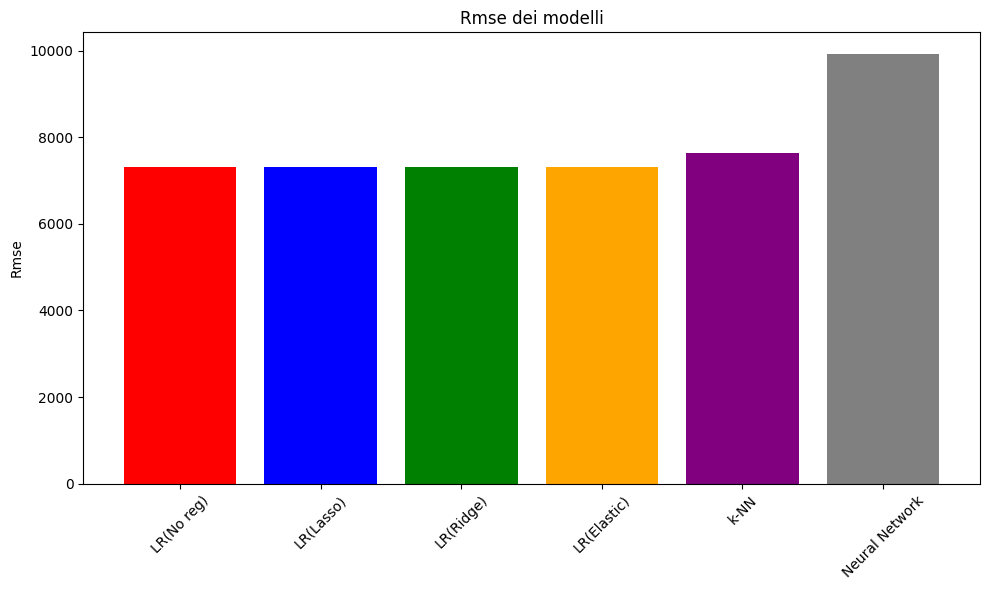

In [89]:
from sklearn.model_selection import train_test_split

def RMSE(y_pred, y_ground):
      residuals = y_pred - y_ground
      mse = np.mean( pow(residuals,2) ) #calcola la media della distanza al quadrato
      return  math.sqrt(mse)

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[: , 2:]#elimino prime due col che non sono predittive

#prima di normalizzare aggiungo la colonna delle ground_truth per la classificazione
dati_norm = normalize(dati.iloc[:, :58]) 

#80% train && val + 20% test
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm, dati.iloc[:, -1], test_size=0.2, random_state=25)

#no reg
w, y_pred_w = multivariate_regression(x_train_val, y_train_val, x_test, y_test, best_learning_rate_no_reg, best_epoche_no_reg,best_toll_no_reg )  
rmse_no_reg = RMSE(y_pred_w, y_test)

#lasso
w_l, y_pred_l = lasso_regres(x_train_val, y_train_val, best_lambda_lasso, x_test, y_test, best_learning_rate_lasso, best_epoche_lasso, best_toll_lasso)
rmse_lasso = RMSE(y_pred_l, y_test)

#ridge
w_r, y_pred_r = ridge_regression(x_train_val, y_train_val, best_lambda_ridge, x_test, y_test)
rmse_ridge = RMSE(y_pred_r, y_test)

#elastic
w_e, y_pred_e = elastic_net_regression( x_train_val, y_train_val,x_test, y_test, best_learning_rate_elastic, best_epoche_elastic, best_toll_elastic, best_lambda_val_elastic, best_alpha_elastic)
rmse_elastic = RMSE(y_pred_e, y_test)

#knn regression
y_train_val_valori = y_train_val.values
y_test_valori = y_test.values
prev_knn_reg = []
for index in range(x_test.shape[0]):
  sample = x_test.iloc[index,:].values
  predizione  = packed_predict_regression( x_train_val, y_train_val_valori, sample, k_migliore_knn_regressione)
  prev_knn_reg.append(predizione)
rmse_knn_reg = RMSE(prev_knn_reg,y_test_valori)

#NN regression
y_train_val = y_train_val.values.reshape((x_train_val.shape[0], 1))
weights1, weights2, bias1, bias2 = neural_network_rl(x_train_val, y_train_val, hidden_size_best_nn_reg, learning_rate_best_nn_reg, epoche_best_nn_reg)
prev_nn_reg = predict_NN_rl(x_test, weights1, weights2, bias1, bias2)
A = []
for i in prev_nn_reg:
  A.append(i[0])
rmse_nn_reg = RMSE( A , y_test.values)

print("Rmse regressione senza regolarizzazione:",rmse_no_reg,"\n")  
print("Rmse regressione con regolarizzazione Lasso:", rmse_lasso,"\n")
print("Rmse regressione con regolarizzazione Ridge", rmse_ridge,"\n")
print("Rmse regressione con regolarizzazione Elastic", rmse_elastic,"\n")
print("Rmse knn:", rmse_knn_reg,"\n")
print("Rmse rete neurale:", rmse_nn_reg,"\n")

import matplotlib.pyplot as plt

# Lista dei nomi dei modelli
nomi_modelli = [ 'LR(No reg)', 'LR(Lasso)', 'LR(Ridge)', 'LR(Elastic)', 'k-NN', 'Neural Network']

# Liste dei valori delle singole metriche per ogni modello
rmses_modelli = [rmse_no_reg, rmse_lasso, rmse_ridge, rmse_elastic, rmse_knn_reg,  rmse_nn_reg]

colori = ['red', 'blue', 'green', 'orange', 'purple', 'gray']

# Plot delle accuracy
plt.figure(figsize=(10, 6))
plt.bar(nomi_modelli, rmses_modelli, color=colori)
plt.ylabel('Rmse')
plt.title('Rmse dei modelli')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Risualtati classificazione

Decision Tree:
accuracy:  60.335477361584054 %
Precision: 0.5998139534883721
Recall: 0.7643432906590801
F1-score: 0.6721567809861358

Linear Regression (No reg):
Vettore dei pesi No reg:
 [ 2.66937631e-04 -1.12912662e-05  1.10630641e-05  1.29457537e-06
  1.63458860e-06  1.10047782e-06  2.25247570e-05  9.46571105e-06
  1.72140034e-05  8.00027230e-07 -7.78957154e-06  1.81687523e-05
  9.44563855e-06 -2.98185638e-05 -4.98098963e-07  2.78186298e-05
  2.55792510e-05 -3.73877457e-05  1.30213651e-05  6.39215494e-06
  9.15878930e-06  2.45118489e-06 -8.94122329e-06  4.29013309e-06
  2.42802134e-05  1.89620670e-05  4.09388097e-05  1.44475311e-05
  1.47325540e-05  1.69439741e-05 -5.12347139e-06 -9.55069822e-06
 -1.06671657e-05 -5.35450797e-06  3.40151695e-07  2.71456550e-05
  2.05548201e-05  3.48384629e-05  1.78166735e-05 -2.06108160e-05
 -3.87385823e-05  1.39208685e-05  2.30116248e-05  1.60770137e-05
  1.81683363e-05  1.42793742e-05 -7.97977405e-06  1.10018562e-05
 -1.87920609e-05  6.56732378e-06

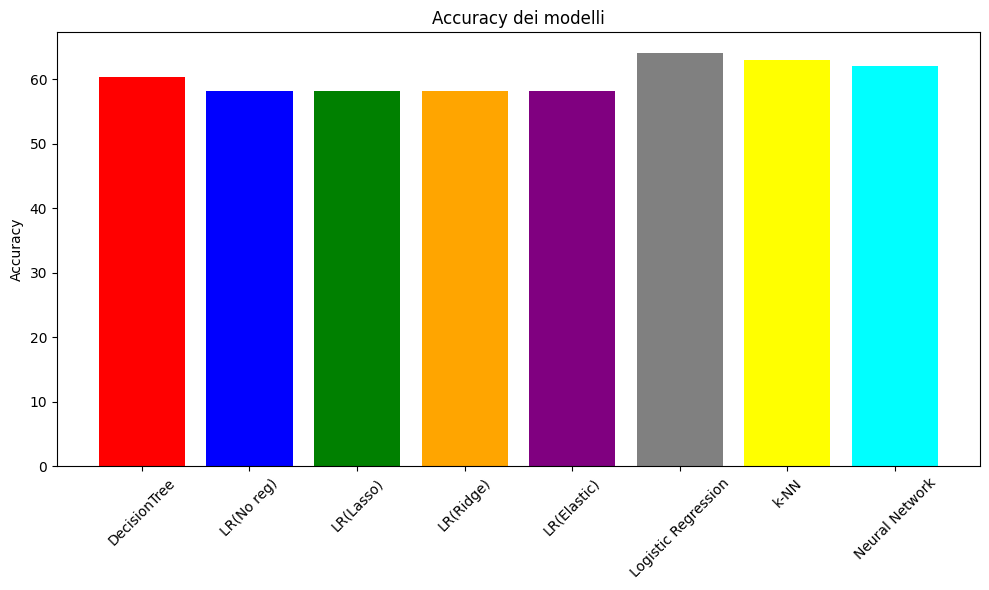

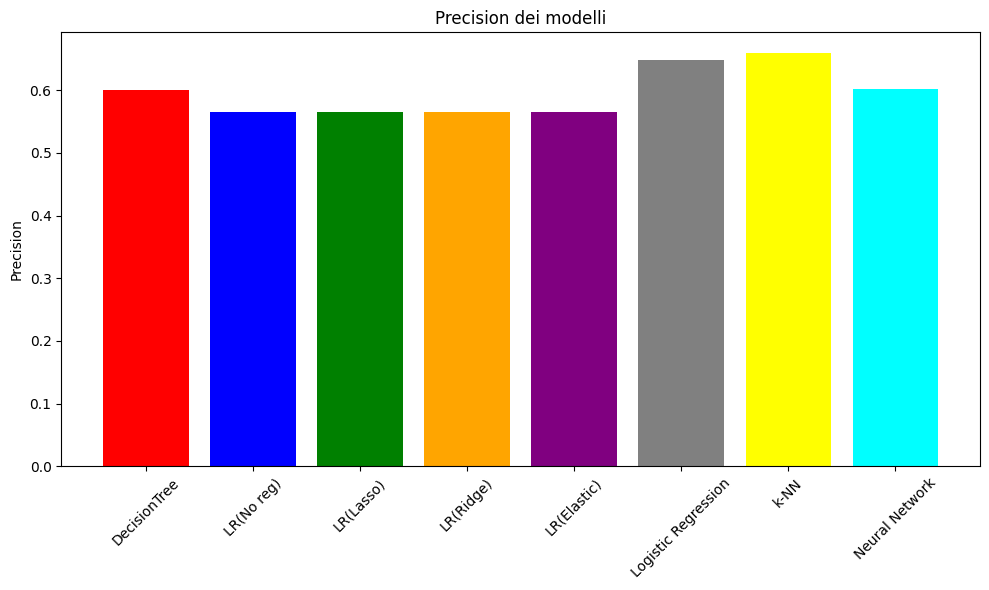

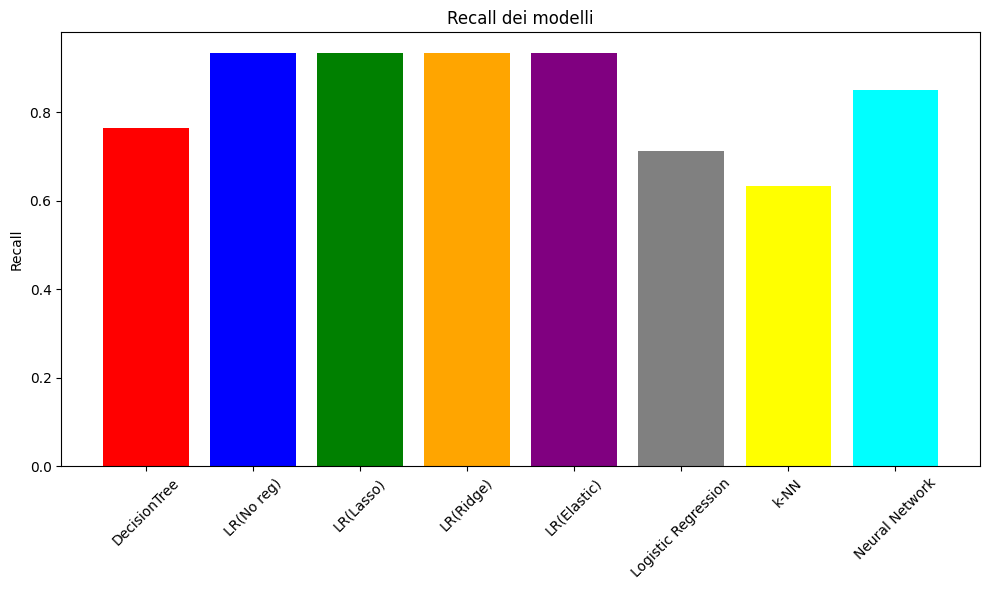

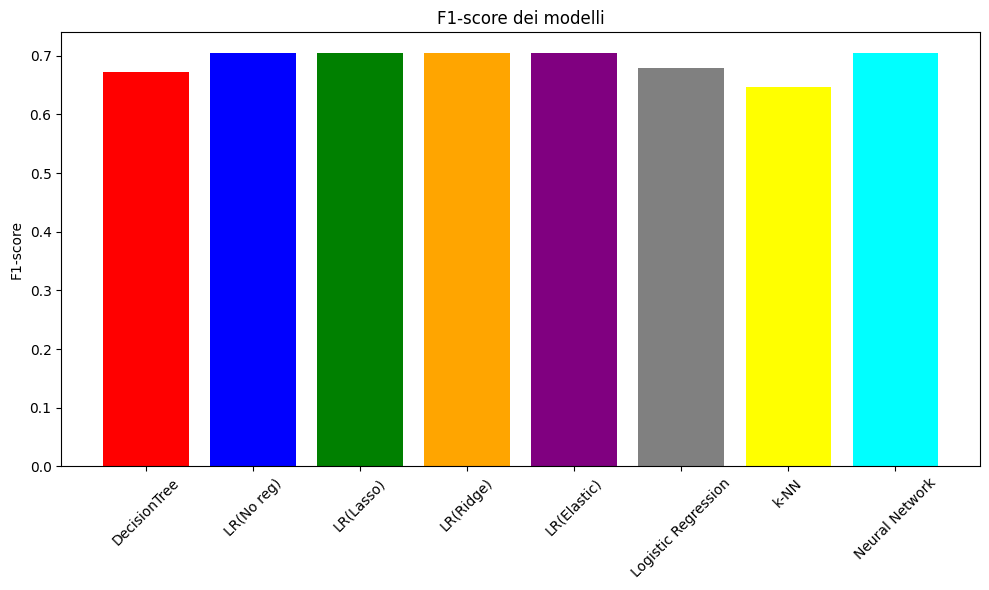

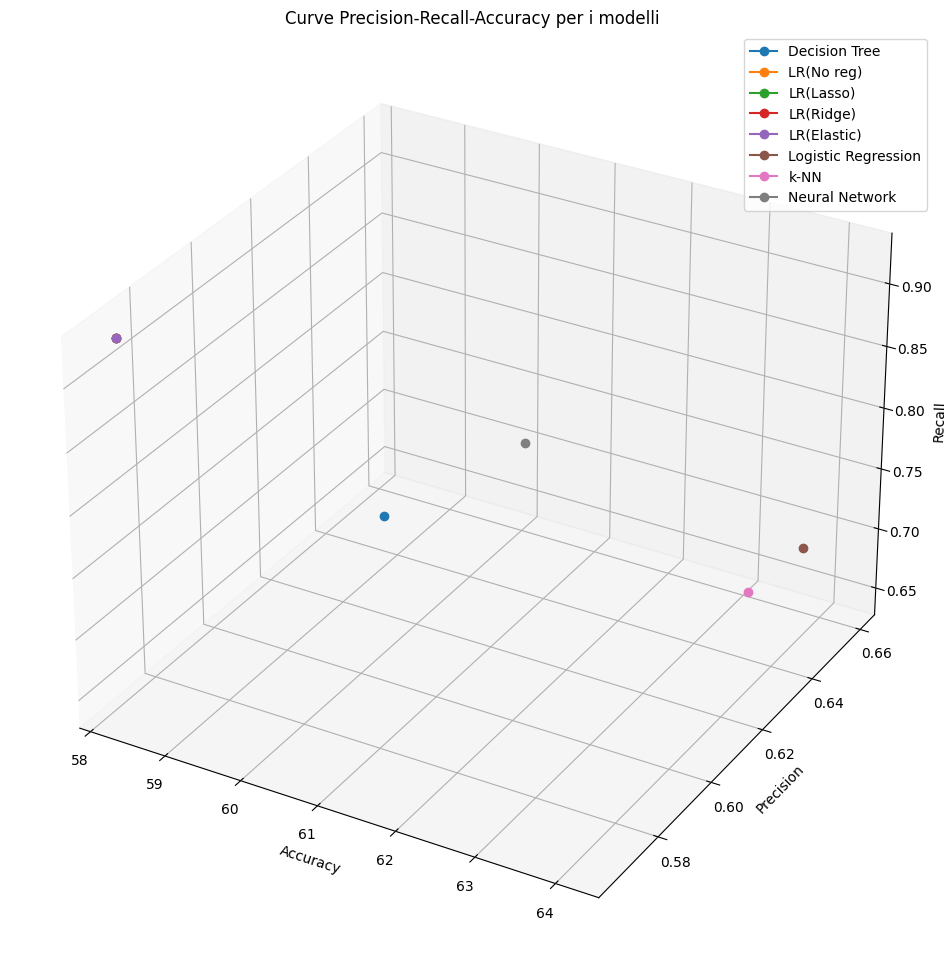

In [105]:
from sklearn.model_selection import train_test_split

def add_Levelcol(nuovo):
  arr = []                 
  num_rows = nuovo.shape[0]
  i = 0
  while(i < num_rows):
    val = nuovo['shares'][i]
    if(val >= 1400):
      arr.append(1)
    else:
      arr.append(0)
    i = i + 1

  new_col = pd.Series(arr)  #creazione nuova col
  nuovo['Level'] = new_col    #aggiungiamo la nuova colonna al dataframe new
  return nuovo

def discretizza(dati):
  col_discr = list(dati.columns.values)
  for column in enumerate(col_discr, 0):
   if(column[1] != "shares" and column[1] != "url"):
      med = dati[column[1]].median()
      dati[column[1]] = np.digitize(dati[column[1]], bins = [med])
  return dati

def normalize(dati):
  c = list(dati.columns.values)
  media  = np.mean(dati[c], axis=0)
  dev = np.std(dati[c], axis=0)
  dati[c] = (dati[c] - media)/dev
  return dati

def ACCURACY(colonna_ground, colonna_prev):   #ACCURACY prende in input colonna delle previsioni e della ground truth, colonna_ground = y_test |  colonna_prev y_prev
  i = 0
  tp_tn = 0
  arr = np.array(colonna_ground.values)
  arr2 = np.array(colonna_prev.values)
  while(i < len(arr2)):                     #devi fare la len su arr2 perche questi sono i test che sono solo il 20% del totale
    if( arr[i] == arr2[i] ):               
      tp_tn = tp_tn + 1
    i = i + 1
  ac = tp_tn/len(arr)*100
  return ac

###########################################################################################################################################

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dati_decision_tree = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati_decision_tree = dati_decision_tree.rename(columns=lambda x: x.strip())

#vale solo per albero decisionale
dati_decision_tree = discretizza(dati_decision_tree)
dati_decision_tree = add_Levelcol(dati_decision_tree) 

dati = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
dati = dati.rename(columns=lambda x: x.strip())
dati = dati.iloc[: , 2:]
df_with_level = add_Levelcol(dati) 
dati_norm = normalize(df_with_level.copy().iloc[:, :58]) 

#80% train && val , 20% test
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_decision_tree.iloc[:, :60], dati_decision_tree.iloc[:, -1], test_size=0.2, random_state=25)

#Decision Tree
albero_finale = DecisionTreeClassifier()
y_train_val = y_train_val.values.reshape(-1,1)
dataset_finale = np.concatenate((x_train_val, y_train_val), axis=1) # allenamento sull'unione di val e train
lista_attr, lista_colonne = obtain_attr() 
max_depth = altezza_best_accuracy #ottenuta attraverso la model selection fatta su validation test
albero_finale.root = grow_tree(dataset_finale, lista_attr, dataset_finale, max_depth ,dataframe_intero_train_finale, lista_colonne) 
y_predict_finale = pd.Series( predict(x_test, albero_finale) )
accuracy_dt = ACCURACY(y_test,y_predict_finale)
precision_dt = precision_score(y_test, y_predict_finale)
recall_dt = recall_score(y_test, y_predict_finale)
f1_dt = f1_score(y_test, y_predict_finale)
print("Decision Tree:")
print("accuracy: ",accuracy_dt,"%")
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)
print()


#80% train && val + 20% test
x_train_val, x_test, y_train_val, y_test = train_test_split(dati_norm.iloc[:, :58], df_with_level.iloc[:, -1], test_size=0.2, random_state=25)

#No reg
w = linear_regression_classificator(x_train_val, y_train_val, best_learning_rate_linRC, best_epoche_linRC, best_toll_linRC) 
y_prev = predict_LinRC(x_test, w)
livelli = np.array(y_test)  #rendo colonna dei livelli_test un array
Y_PRED =  pd.Series(y_prev)     #converto in series per funzione accurcy
Y_TESTING = pd.Series(livelli)
accuracy_no_reg = ACCURACY(Y_TESTING,Y_PRED)
precision_no_reg = precision_score(Y_TESTING, Y_PRED)
recall_no_reg = recall_score(Y_TESTING, Y_PRED)
f1_no_reg = f1_score(Y_TESTING, Y_PRED)
print("Linear Regression (No reg):")
print("Vettore dei pesi No reg:\n",w)
print("accuracy:",accuracy_no_reg,"%")
print("Precision:", precision_no_reg)
print("Recall:", recall_no_reg)
print("F1-score:", f1_no_reg)
print()

#Lasso
w = linear_regression_classificator_LASSO(x_train_val, y_train_val, best_learning_rate_linRC_lasso, best_epoche_linRC_lasso, best_toll_linRC_lasso,best_lambda_result_lasso) 
y_prev = predict_LinRC(x_test, w)
livelli = np.array(y_test)  #rendo colonna dei livelli_test un array
Y_PRED =  pd.Series(y_prev)     #converto in series per funzione accurcy
Y_TESTING = pd.Series(livelli)
accuracy_lasso = ACCURACY(Y_TESTING,Y_PRED)
precision_lasso = precision_score(Y_TESTING, Y_PRED)
recall_lasso = recall_score(Y_TESTING, Y_PRED)
f1_lasso = f1_score(Y_TESTING, Y_PRED)
print("Linear Regression (Lasso):")
print("Vettore dei pesi Lasso:\n",w)
print("accuracy:",accuracy_lasso,"%")
print("Precision:", precision_lasso)
print("Recall:", recall_lasso)
print("F1-score:", f1_lasso)
print()

#Ridge
w = linear_regression_classificator_RIDGE(x_train_val, y_train_val, best_learning_rate_linRC_ridge, best_epoche_linRC_ridge, best_toll_linRC_ridge,best_lambda_result_ridge) 
y_prev = predict_LinRC(x_test, w)
livelli = np.array(y_test)  #rendo colonna dei livelli_test un array
Y_PRED =  pd.Series(y_prev)     #converto in series per funzione accurcy
Y_TESTING = pd.Series(livelli)
accuracy_ridge = ACCURACY(Y_TESTING,Y_PRED)
precision_ridge = precision_score(Y_TESTING, Y_PRED)
recall_ridge = recall_score(Y_TESTING, Y_PRED)
f1_ridge = f1_score(Y_TESTING, Y_PRED)
print("Linear Regression (Ridge):")
print("Vettore dei pesi Ridge:\n",w)
print("accuracy:",accuracy_ridge,"%")
print("Precision:", precision_ridge)
print("Recall:", recall_ridge)
print("F1-score:", f1_ridge)
print()

#Elastic
w_e = linear_regression_classificator_elastic_net(x_train_val, y_train_val, x_test, y_test, best_learning_rate_elastic_clas, best_epoche_elastic_clas, best_toll_elastic_clas, best_lambda_val_elastic_clas, best_alpha_elastic_clas)
y_prev = predict_LinRC(x_test, w_e)
livelli = np.array(y_test)  #rendo colonna dei livelli_test un array
Y_PRED =  pd.Series(y_prev)     #converto in series per funzione accurcy
Y_TESTING = pd.Series(livelli)
accuracy_elastic = ACCURACY(Y_TESTING,Y_PRED)
precision_elastic = precision_score(Y_TESTING, Y_PRED)
recall_elastic = recall_score(Y_TESTING, Y_PRED)
f1_elastic = f1_score(Y_TESTING, Y_PRED)
print("Linear Regression (Elastic):")
print("Vettore dei pesi Elastic:\n",w_e)
print("accuracy:",accuracy_elastic,"%")
print("Precision:", precision_elastic)
print("Recall:", recall_elastic)
print("F1-score:", f1_elastic)
print()

#Logistic
w, B = logistic_regression(x_train_val, y_train_val, best_learning_rate_log, best_epoche_log, best_toll_log) 
y_prev = predict_LogRC_con_bias(x_test, w, B)
livelli = np.array(y_test)  #rendo colonna dei livelli_test un array
Y_PRED =  pd.Series(y_prev)     #converto in series per funzione accurcy
Y_TESTING = pd.Series(livelli)
accuracy_lg = ACCURACY(Y_TESTING,Y_PRED)
precision_lg = precision_score(Y_TESTING, Y_PRED)
recall_lg = recall_score(Y_TESTING, Y_PRED)
f1_lg = f1_score(Y_TESTING, Y_PRED)
print("Logistic Regression:")
print("accuracy:",accuracy_lg,"%")
print("Precision:", precision_lg)
print("Recall:", recall_lg)
print("F1-score:", f1_lg)
print()

#Knn
y_lev_train_val = y_train_val.values
y_lev_test = y_test.values
prev = []
for index in range(x_test.shape[0]):
  sample = x_test.iloc[index,:].values
  predizione  = packed_predict_classification( x_train_val, y_lev_train_val, sample, k_best_for_knn_class)
  prev.append(predizione)

Y_PRED =  pd.Series(prev)
Y_TESTING = pd.Series(y_lev_test)
accuracy_knn = ACCURACY(Y_TESTING,Y_PRED)
precision_knn = precision_score(Y_TESTING, Y_PRED)
recall_knn = recall_score(Y_TESTING, Y_PRED)
f1_knn = f1_score(Y_TESTING, Y_PRED)
print("k-NN Classifier:")
print("accuracy':",accuracy_knn,"%") 
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:",f1_knn)
print()

#Neural Network
output_size = 1
input_size= x_train_val.shape[1] 
y_train_val = y_train_val.values.reshape((x_train_val.shape[0], 1)) 
nn = NeuralNetwork(input_size, hidden_size_best_nn_class , output_size)
nn.train(x_train_val, y_train_val, epoche_best_nn_class , learning_rate_best_nn_class )
prev_nn_class = nn.predict_NNcl(x_test)
A = []
for i in prev_nn_class:
  A.append(i[0])
livelli = np.array(y_test)  #rendo colonna dei livelli_test un array
Y_PRED =  pd.Series(A)
Y_TESTING = pd.Series(livelli)
accuracy_nn = ACCURACY(Y_TESTING,Y_PRED)
precision_nn = precision_score(Y_TESTING, Y_PRED)
recall_nn = recall_score(Y_TESTING, Y_PRED)
f1_nn = f1_score(Y_TESTING, Y_PRED)
print("NN Classifier:")
print("ACCURACY Di NN CLASSIFICATOR E':",accuracy_nn,"%") 
print("Precision:", precision_nn)
print("Recall:", recall_nn)
print("F1-score:",f1_nn)
print()

import matplotlib.pyplot as plt

# Lista dei nomi dei modelli
nomi_modelli = ['DecisionTree', 'LR(No reg)', 'LR(Lasso)', 'LR(Ridge)', 'LR(Elastic)', 'Logistic Regression', 'k-NN', 'Neural Network']

# Liste dei valori delle singole metriche per ogni modello
accuracies = [accuracy_dt, accuracy_no_reg, accuracy_lasso, accuracy_ridge, accuracy_elastic, accuracy_lg, accuracy_knn, accuracy_nn]
precisions = [precision_dt, precision_no_reg, precision_lasso, precision_ridge, precision_elastic, precision_lg, precision_knn, precision_nn]
recalls = [recall_dt, recall_no_reg, recall_lasso, recall_ridge, recall_elastic, recall_lg, recall_knn, recall_nn]
f1_scores = [f1_dt, f1_no_reg, f1_lasso, f1_ridge, f1_elastic, f1_lg, f1_knn, f1_nn]

colori = ['red', 'blue', 'green', 'orange', 'purple', 'gray', 'yellow', 'cyan']

# Plot delle accuracy
plt.figure(figsize=(10, 6))
plt.bar(nomi_modelli, accuracies, color=colori)
plt.ylabel('Accuracy')
plt.title('Accuracy dei modelli')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot delle precision
plt.figure(figsize=(10, 6))
plt.bar(nomi_modelli, precisions, color=colori)
plt.ylabel('Precision')
plt.title('Precision dei modelli')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot delle recall
plt.figure(figsize=(10, 6))
plt.bar(nomi_modelli, recalls, color=colori)
plt.ylabel('Recall')
plt.title('Recall dei modelli')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot dei F1-score
plt.figure(figsize=(10, 6))
plt.bar(nomi_modelli, f1_scores, color=colori)
plt.ylabel('F1-score')
plt.title('F1-score dei modelli')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


from mpl_toolkits.mplot3d import Axes3D#libreria per realizzare il grafico in tre dimensioni

#si dovrebbe poter togliere poiche definite sopra
nomi_modelli = ['Decision Tree', 'LR(No reg)', 'LR(Lasso)', 'LR(Ridge)', 'LR(Elastic)', 'Logistic Regression', 'k-NN', 'Neural Network']
precisioni = [precision_dt, precision_no_reg, precision_lasso, precision_ridge, precision_elastic, precision_lg, precision_knn, precision_nn]
recalls = [recall_dt, recall_no_reg, recall_lasso, recall_ridge, recall_elastic, recall_lg, recall_knn, recall_nn]
accuracies = [accuracy_dt, accuracy_no_reg, accuracy_lasso, accuracy_ridge, accuracy_elastic, accuracy_lg, accuracy_knn, accuracy_nn]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel('Recall')
ax.set_ylabel('Precision')
ax.set_xlabel('Accuracy')
ax.set_title('Curve Precision-Recall-Accuracy per i modelli')

for model_name, precision, recall, accuracy in zip(nomi_modelli, precisioni, recalls, accuracies):
    ax.plot(accuracy, precision, recall, marker='o', label=model_name)

ax.legend()
plt.show()



In [106]:

print("Accuracy della classificazione:")
print("mediante DecisionTree:", accuracy_dt , "%")
print("mediante regressione lineare senza regolarizzazione:",accuracy_no_reg ,"%")
print("mediante regressione lineare con regolarizzazione Lasso:", accuracy_lasso,"%")
print("mediante regressione lineare con regolarizzazione Ridge:",accuracy_ridge ,"%")
print("mediante regressione lineare con regolarizzazione Elastic:",accuracy_elastic,"%")
print("mediante regressione logistica:", accuracy_lg, "%")
print("mediante Knn:", accuracy_knn ,"%")
print("mediante Rete Neurale:", accuracy_nn, "%")

print("Rmse:")
print("regressione lineare senza regolarizzazione:", rmse_no_reg)
print("regressione lineare con regolarizzazione Lasso:", rmse_lasso)
print("regressione lineare con regolarizzazione Ridge:", rmse_ridge)
print("regressione lineare con regolarizzazione Elastic:", rmse_elastic)
print("regressione con Knn:", rmse_knn_reg)
print("regressione con Rete Neurale:", rmse_nn_reg)

Accuracy della classificazione:
mediante DecisionTree: 60.335477361584054 %
mediante regressione lineare senza regolarizzazione: 58.27973262706521 %
mediante regressione lineare con regolarizzazione Lasso: 58.27973262706521 %
mediante regressione lineare con regolarizzazione Ridge: 58.27973262706521 %
mediante regressione lineare con regolarizzazione Elastic: 58.27973262706521 %
mediante regressione logistica: 64.10644469668306 %
mediante Knn: 63.08487829486694 %
mediante Rete Neurale: 62.08853575482406 %
Rmse:
regressione lineare senza regolarizzazione: 7319.1376088405195
regressione lineare con regolarizzazione Lasso: 7314.926422659248
regressione lineare con regolarizzazione Ridge: 7321.582510905191
regressione lineare con regolarizzazione Elastic: 7319.074061477604
regressione con Knn: 7634.23718059198
regressione con Rete Neurale: 9924.045793327932


Conclusioni finali:
<br>
Nell'homework prima ogni algoritmo implementato ho riportato la spiegazione, in poche righe, di cosa svolge ogni funzioni che ho usato e abbinata a ogni mia implementazione ho riportato sempre quella di sklearn per controllare che i valori non venissero troppo differenti dai miei.<br>

Prima di discutere dei risultati ottenuti dai modelli che ho implementato reputo necessario spiegare come ho trattato i dati prima di darli in input ai vari modelli. 
Per quanto riguarda la divisione del dataset ho sempre diviso nella seguente maniera: 60% training set, 20% validation set e 20% testing set. Per ottenere risultati migliori ogni volta ho implementato la model selection tramite k fold cross validation (k=3) in modo da trovare gli iperparametri che permetto di far performare al meglio i nostri modelli.
Per quanto riguarda il pre-processamento dei dati, a prescindere dalla tipologia del problema ho sempre eliminato dal dataset le prime due colonne (URL, timedelta) le quali non sono predittive, cioè non influenzano il risultato della shares che otterrà l’articolo. In base al problema ho modificato diversamente i dati:
-	Nel caso della Classificazione ho sempre aggiunto al dataset una colonna di valori binari, tamite un’apposita funzione. Se il valore associato a un sample in questa colonna è 1 indica che questo avrà un numero di condivisioni > 1400, altrimenti minore. 
Nel modello DecisonTree ho manipolato i dati di tutte le feature discretizzandoli cosi da ottenere un albero di decisione binario. Per la discretizzazione di questi per ogni colonna mi sono calcolato la media e l’ho usata come soglia per sostituire i valori in base a se fossero sopra o sotto tale trashold. Gli altri modelli li ho sempre normalizzati , più precisamente li ho normalizzati in maniera tale che avessero una media zero e una deviazione standard unitaria. 

-	Nel caso della regressione anche ho sempre normalizzato i dati secondo la tecnica descritta sopra.
La scelta della normalizzazione dei dati deriva, come detto anche a lezione, dal fatto che questa tecnica migliora i risultati  ottenuti da un modello. Un esempio di miglioramento di un modello è la rimozione degli  "outliners" cioè  valori molto estremi in una certa feature che possono disturbare l'apprendimento del modello. La normalizzazione attenua l'impatto di questi valori riducendoli nel loro range normalizzato. 

<br><br>
Regressione
- Regressione senza regolarizzazione (RMSE: 7319.2188): Questo è il modello di base, che non utilizza alcuna tecnica di regolarizzazione per evitare l'overfitting. Implementata tramite Gradient Descent con una certa tolleranza per comprendere quando si è giunti a convergenza e uscire dal ciclo delle epoche.
- Regressione con regolarizzazione Lasso (RMSE: 7314.9264): La regressione Lasso utilizza la regolarizzazione L1 per ridurre l'overfitting e selezionare le variabili più rilevanti. In questo caso, il modello Lasso ha ottenuto un RMSE leggermente inferiore rispetto al modello senza regolarizzazione, il che suggerisce che potrebbe esserci una leggera riduzione dell'overfitting. Implementazione con Gradient Descent.
- Regressione con regolarizzazione Ridge (RMSE: 7321.5825): In questo caso, il modello Ridge ha ottenuto un RMSE leggermente superiore rispetto al modello senza regolarizzazione. Una possibile spiegazione per questo risultato potrebbe essere che la regolarizzazione Ridge sta cercando di ridurre la complessità del modello penalizzando i coefficienti delle variabili meno importanti, il che potrebbe portare il modello a adattarsi meno ai dati e di conseguenza performare peggio. Sottolineo come la regressione con regolarizzazione Ridge l’ho implementata attraverso la forma chiusa invece che con il Gradient Descent, questo perché ho notato come tale forma ottenesse risultati leggermente migliori.
- Regressione con regolarizzazione Elastic (RMSE: 7319.0741): La regressione Elastic Net combina le regolarizzazioni L1 e L2, cercando di ottenere il meglio da entrambi i metodi. In questo caso, il modello Elastic Net ha ottenuto un RMSE simile al modello senza regolarizzazione e al modello Lasso. Questo suggerisce che la combinazione di entrambe le regolarizzazioni non ha portato a miglioramenti significativi. Anche questa regressione è  stata implementata tramite Gradient Descent.
- k-Nearest Neighbors (RMSE: 7634.2372): Il modello k-NN è un modello non parametrico che si basa sulla distanza tra i samples per effettuare predizioni. In questo caso, a dispetto del problema di classificazione, il modello k-NN non ha avuto in generale una ottima previsione sul target rispetto agli altri modelli, bensì nella media. Questo potrebbe essere dovuto al fatto che KNN è un algoritmo istance based e che cerca di prevedere la popolarità di una notizia basandosi sulla sua similarità con altre notizie nel dataset (facendo table look up per cercare i sample più vicini a quello di cui si vuole prevedere la ground truth e le loro label) e quindi proprio perché si basa su altri sample vicini non è in grado di cogliere correlazioni più complicate tra le variabili indipendenti e la variabile dipendente. In aggiunta, il risultato potrebbe essere influenzato negativamente da una penalizzazione dovuta alla previsione di un campione di test che si basa sulla media delle etichette corrette dei campioni vicini. Pertanto, potrebbe verificarsi la situazione in cui i campioni vicini non siano sufficientemente simili e, di conseguenza, al campione in questione verrebbe assegnata una previsione distante da quella reale. Nell’implementazione uso la funzione cdist di scipy.spatial.distance per calcolare le distanze euclidee perché il calcolo delle distanze realizzato da me tramite una scansione del set di training impiegava un tempo eccessivo.
- Rete neurale (RMSE: 9924.04) (valori variabili a causa dell'inizializzazione casuale dei pesi): Le reti neurali sono modelli potenti e flessibili che possono apprendere rappresentazioni complesse dei dati. Tuttavia, in questo caso, la rete neurale ha ottenuto un RMSE significativamente superiore rispetto agli altri modelli, il che suggerisce che potrebbe essere non configurata correttamente per questo problema, suppongo sia legato al vincolo posto sul numero di middle layer. 

Quindi i modelli di regressione lineare hanno ottenuto i valori migliori di Rmse, specificatamente il più performante è stato l’algoritmo di regressione lineare che sfrutta la regolarizzazione di Lasso (rmse: 7314.9264).
Osservando le performance degli altri modelli si nota che quelli lineari hanno ottenuti i migliori risultati quindi suppongo che vi sia una relazione lineare tra le feature e la variabile target. I modelli non lineari come knn e rete neurale non riescono a catturare questa relazione, quindi ottengono prestazioni peggiori.

E’ importante sottolineare come la differenza tra le prestazioni conseguite tra i modelli di regressione è abbastanza piccola, quindi potrebbe essere utile esplorare ulteriormente i dati e sperimentare con diverse tecniche di pre-elaborazione e di Feature selection per ottenere risultati migliori.

<br><br>
Classificazione
- Albero di decisione:  Ha ottenuto buoni risultati con un’ accuratezza del 60.39% (altezza massima 6) che può essere attribuita alla sua capacità di identificare pattern complessi all'interno del dataset  e relazioni  non lineari  fra features e ground truth. Gli alberi di decisione sono algoritmi che inizialmente in fase di training costruiscono una struttura ad albero per dividere il dataset in sottoinsiemi in base alle caratteristiche degli input e successivamente in fase di testing utilizzano la struttura ad albero creata in fase di training per classificare le istanze di test. Implementato tramite una classe Nodo che rappresenta gli elementi che compongono l’albero e una classe DecisionTreeClassifier che rappresenta il classificatore dell'albero decisionale. La funzione grow_tree è la funzione che popola l’albero di decisione in fase di training per poi usarlo in fase di testing.
- Regressione lineare: eseguita sia senza regolarizzazione che con varianti Ridge, Lasso ed Elastic, ha mostrato un'accuratezza del 58%. La regressione lineare assume una relazione lineare tra le variabili indipendenti (feature) e la variabile dipendente (ground truth), tuttavia, potrebbe non essere in grado di catturare al massimo la complessità del dataset se ci sono relazioni non lineari o variabili non rilevanti per la classificazione. Inoltre sottolineerei come il fatto che i risultati ottenuti con 3 diverse regolarizzazioni (no regolarizzazione, Ridge ed Elastic) siano identici potrebbe essere dovuto al fatto che la regolarizzazione non ha avuto un impatto significativo sulla prestazione del modello. Invece per quanto riguarda il fatto che la regressione lineare con regolarizzazione Lasso abbia ottenuto la stessa accuracy delle altre lo riconduco alla trashold posta nella predict, usata per ottenere la previsione di una classificazione, magari con valori differenti di questa si sarebbe discostata dagli altri risultati di classificazione con regressione. Infatti a differenza delle altre regressioni questa ha un vettore dei pesi totalmente differente (stampato a schermo nella penultima cella) , il che sottolinea come la regolarizzazione ha impattato sul modello, ma comunque la accuracy ottenuta sia uguale alle altre. Implementazione: a differenza dell’implementazione per il problema di regerssione, qui anche la ridge è stata implementata con Gradient Descent
-Regressione Logistica: accuracy del 64.10% la più alta fra i modelli. Dato che i risultati migliori sono stati ottenuti da modelli non lineari (Logistica, Knn, Reti Neurali, Decisiontree) reputo che questo modello abbia un ottima accuracy per la presenza di relazioni non lineari fra dati in input e la label e a quanto risulta la funzione sigmoide, a cui viene applicata una soglia (0.5) per la classificazione, coglie molto bene tale relazione.
- K-Nearest Neighbors (KNN): L'accuratezza del 63.08% ottenuta con il KNN può essere attribuita alla capacità dell'algoritmo di classificare un'istanza di test assegnandole l'etichetta più comune tra i suoi K vicini più prossimi (sulla base della distanza dei sample nel dataset) nel training set. In generale l'algoritmo funziona bene quando i dati sono uniformemente distribuiti nello spazio delle caratteristiche. Se la distribuzione è molto diversa e i gruppi sono molto diversi tra loro, questo potrebbe influenzare negativamente le prestazioni del kNN. Avendo ottenuto una accuracy alta ciò potrebbe indicare che il dataset è omogeneo e l'omogeneità del dataset potrebbe essere dovuta al fatto che ho eseguito una modellazione del dataset normalizzando le features.
- Rete neurale: La rete neurale ha ottenuto un'accuratezza del 62.08% (con valori variabili a causa dell'inizializzazione casuale dei pesi). Le reti neurali sono modelli complessi in grado di catturare relazioni non lineari complesse nel dataset. Reputo che la rete neurale non abbia ottenuto i risultati migliori, come invece mi sarei aspettato, perché la performance di questi modelli è fortemente influenzata dall'architettura della rete e noi abbiamo posto un forte vincolo su questa cioè quello di avere un singolo middle layer. Implementazione: a dispetto di come è stata implementata per il problema di regressione qui l’ho implementata creando la sua classe 

L'accuratezza più alta è stata ottenuta dal Regressione Logistica 64.10%, seguita da k-NN Classifier con 63.08%, ciò nonostante anche il modello più accurato non ha raggiunto una accuracy così sostanzialmente elevata, il che suggerisce che il problema potrebbe essere complesso. Performance migliori potrebbero essere ottenute utilizzando modelli più complessi come le reti neurali con architetture più articolate,  o modelli ensemble come Random Forest, AdaBoost e Gradient Boosting, che spesso forniscono ottime prestazioni combinando più modelli.<br>
Tuttavia, reputo interessante analizzare i risultati ottenuti dai modelli in ulteriori tre metriche: Precision,  Recall e F1.

La precisione misura la proporzione di predizioni positive corrette fatte dal modello rispetto al totale delle predizioni positive fatte dal modello. In altre parole, la precisione indica quanto il modello è preciso nel classificare correttamente gli esempi positivi.  La recall misura la capacità del modello di identificare correttamente tutti gli esempi positivi presenti nel set di dati. Quindi questa metrica evidenzia la proporzione di esempi positivi correttamente identificati dal modello rispetto al numero totale di esempi positivi presenti nel set di dati. 
Sostanzialmente la precisione si concentra sulla qualità delle predizioni positive fatte dal modello, mentre la recall si concentra sulla capacità del modello di identificare correttamente gli esempi positivi senza trascurarne nessuno.
F1-score tiene conto sia della capacità del modello di identificare correttamente gli esempi positivi (recall) che della sua capacità di evitare falsi positivi (precision). È particolarmente utile quando le classi di interesse sono sbilanciate, cioè quando una classe è rappresentata in modo significativamente maggiore rispetto all'altra

Considerando la precision, il k-NN Classifier ottiene il valore più alto (0.66), seguito dal Logistic regression (0.64) e dal NN Classifier (0.60)(ha valori variabili a causa dei pesi inizializzati random). Questo indica che il k-NN Classifier è più preciso nel classificare correttamente gli esempi positivi rispetto agli altri due modelli.

Il recall è più alto lo hanno le regressioni lineari (0.93). Ciò significa che sono in grado di identificare correttamente una maggiore proporzione di esempi positivi rispetto agli altri modelli. Hanno la capacità di catturare la maggior parte degli articoli con un alto numero di condivisioni nel set di dati.

F-1 score La rete neurale ottiene il miglior risultato(0.70477), le regressioni ottengono il secondo punteggio più alto (0.7), seguite dalla Logistic Regression (0.678). Quindi le regressioni  hanno un migliore equilibrio tra precisione e recall rispetto agli altri modelli.


In base a queste analisi si può notare come anche avendo la accuracy più alta il modello di regressione logistica non sempre è il modello migliore se si considerano altre metriche. Nelle altre metrivalutazioni non ha i risultati migliori, ma comunque si pone sempre fra i primi quindi reputo che sia il modello più performante che esegue classificazione fra tutti quelli implementati 


